In [37]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import torch
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import classification_report, make_scorer, recall_score
from transformers import AutoTokenizer, AutoModel
import pandas as pd
from scipy.stats import hmean
import pickle
from sklearn.utils import resample
import xgboost as xgb

In [2]:
Train_Features = [
    "ticker", "company_name", "sector", "industry", "market_cap",
    "price", "open", "close", "high", "low",
    "volume", "adj_close", "dividend", "dividend_yield", "pe_ratio",
    "eps", "beta", "52_week_high", "52_week_low", "shares_outstanding",
    "float", "average_volume", "market", "exchange", "isin",
    "cusip", "country", "currency", "ipo_date", "earnings_date",
    "revenue", "cost_of_goods_sold", "gross_profit", "operating_expenses", "operating_income",
    "ebit", "ebitda", "net_income", "income_before_tax", "tax_expense",
    "net_income_applicable_to_common_shares", "basic_eps", "diluted_eps", "total_assets", "current_assets",
    "non_current_assets", "total_liabilities", "current_liabilities", "non_current_liabilities", "shareholders_equity",
    "retained_earnings", "cash_and_cash_equivalents", "short_term_investments", "long_term_investments", "inventory",
    "accounts_receivable", "accounts_payable", "depreciation", "amortization", "capital_expenditures",
    "loan_id", "loan_amount", "loan_term", "interest_rate", "installment",
    "issue_date", "loan_status", "payment_status", "borrower_score", "borrower_income",
    "debt_to_income", "employment_length", "purpose", "home_ownership", "delinquency_2yrs",
    "credit_score", "fico_range_low", "fico_range_high", "revol_util", "num_open_credit_lines",
    "total_credit_lines", "public_records", "collections_12_mths_ex_med", "application_type", "verification_status",
    "bond_id", "bond_name", "maturity_date", "coupon_rate", "yield_to_maturity",
    "face_value", "issue_price", "current_price", "duration", "convexity",
    "credit_rating", "issuer", "callable", "puttable", "bond_type",
    "transaction_id", "transaction_date", "transaction_amount", "transaction_type", "merchant_name",
    "merchant_category", "account_id", "balance_before", "balance_after", "location",
    "crypto_symbol", "crypto_name", "market_rank", "circulating_supply", "total_supply",
    "max_supply", "market_dominance", "all_time_high", "all_time_low", "last_updated",
    "block_time", "hashing_algorithm", "platform", "explorer_url", "trading_pairs",
    "exchange_rate", "currency_pair", "base_currency", "quote_currency", "rate_date",
    "rate_time", "daily_change", "monthly_change", "yearly_change", "volume_24h",
    "investment_id", "investment_type", "investment_amount", "investment_date", "current_value",
    "gain_loss", "annual_return", "investment_duration", "investment_strategy", "fund_manager",
    "fund_id", "fund_name", "nav", "expense_ratio", "inception_date",
    "fund_category", "assets_under_management", "benchmark_index", "turnover_ratio", "dividend_distribution",
    "gdp", "inflation_rate", "unemployment_rate", "federal_funds_rate", "consumer_price_index",
    "producer_price_index", "retail_sales", "housing_starts", "trade_balance", "government_debt",
    "current_account_balance", "budget_deficit", "foreign_reserves", "money_supply", "taxpayer_id",
    "income_bracket", "taxable_income", "effective_tax_rate", "tax_paid", "deductions",
    "credits", "filing_status", "tax_year", "refund_amount", "bank_id",
    "branch_id", "account_type", "account_open_date", "account_balance", "interest_earned",
    "overdraft_limit", "minimum_balance", "monthly_fee", "account_status", "user_id",
    "customer_id", "registration_date", "last_login", "kyc_status", "risk_score",
    "fraud_flag", "device_id", "ip_address", "login_location", "portfolio_id",
    "asset_class", "allocation_percentage", "benchmark_return", "tracking_error", "sharpe_ratio",
    "alpha", "beta_coefficient", "standard_deviation", "max_drawdown", "audit_status", "accounting_standard", "financial_statement_type", "reporting_currency", "adjustment_reason",
    "deferred_tax_assets", "deferred_tax_liabilities", "intangible_assets", "goodwill", "preferred_equity",
    "policy_id", "policy_holder", "premium_amount", "coverage_amount", "claim_id",
    "claim_status", "underwriting_score", "risk_class", "loss_ratio", "combined_ratio",
    "order_id", "trade_price", "trade_volume", "order_type", "execution_time",
    "bid_price", "ask_price", "spread", "order_book_depth", "trading_halt",
    "swift_code", "iban", "routing_number", "account_opening_method", "branch_location",
    "atm_withdrawals", "wire_transfers", "monthly_statements", "account_tier", "fee_structure",
    "credit_limit", "credit_line_type", "charge_off_status", "days_past_due", "collection_agency",
    "restructuring_status", "forbearance_flag", "loan_purpose", "collateral_type", "repayment_behavior",
    "employment_rate", "labor_force_participation", "consumer_confidence_index", "housing_index", "manufacturing_index",
    "import_volume", "export_volume", "interest_payment", "sovereign_rating", "external_debt",
    "payment_method", "payment_gateway", "settlement_status", "refund_status", "dispute_id",
    "chargeback_amount", "recurring_payment", "subscription_id", "billing_cycle", "invoice_date",
    "wealth_segment", "advisor_id", "fee_schedule", "client_risk_profile", "discretionary_mandate",
    "goals_based_plan", "financial_goal", "investment_objective", "cash_allocation", "equity_allocation",
    "esg_score", "carbon_emission", "sustainability_rating", "board_diversity", "executive_compensation_ratio"
]

In [3]:
Test_Features = [
   "revenue_growth", "net_margin", "operating_margin", "book_value_per_share", "enterprise_value",
   "ev_to_ebitda", "price_to_free_cash_flow", "fcf_margin", "roic", "roa",
   "cash_conversion_cycle", "interest_coverage_ratio", "days_payable_outstanding", "inventory_turnover", "quick_ratio",
   "z_score", "altman_z_score", "short_interest_ratio", "put_call_ratio", "analyst_recommendation",
   "price_target_high", "price_target_low", "estimate_revision", "guidance_change", "buyback_yield",
   "s&p_rating", "moody_rating", "recovery_rate", "default_probability", "credit_spread",
   "real_interest_rate", "velocity_of_money", "consumer_sentiment_index", "labor_cost_index", "construction_spending",
   "crypto_funding_rate", "staking_yield", "token_burn_rate", "dao_votes", "mining_difficulty",
   "digital_wallet_id", "transaction_fee", "payment_token", "subscription_status", "auto_renew_flag",
   "claim_frequency", "premium_to_coverage_ratio", "lapse_rate", "policy_duration", "actuarial_value"
]


In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


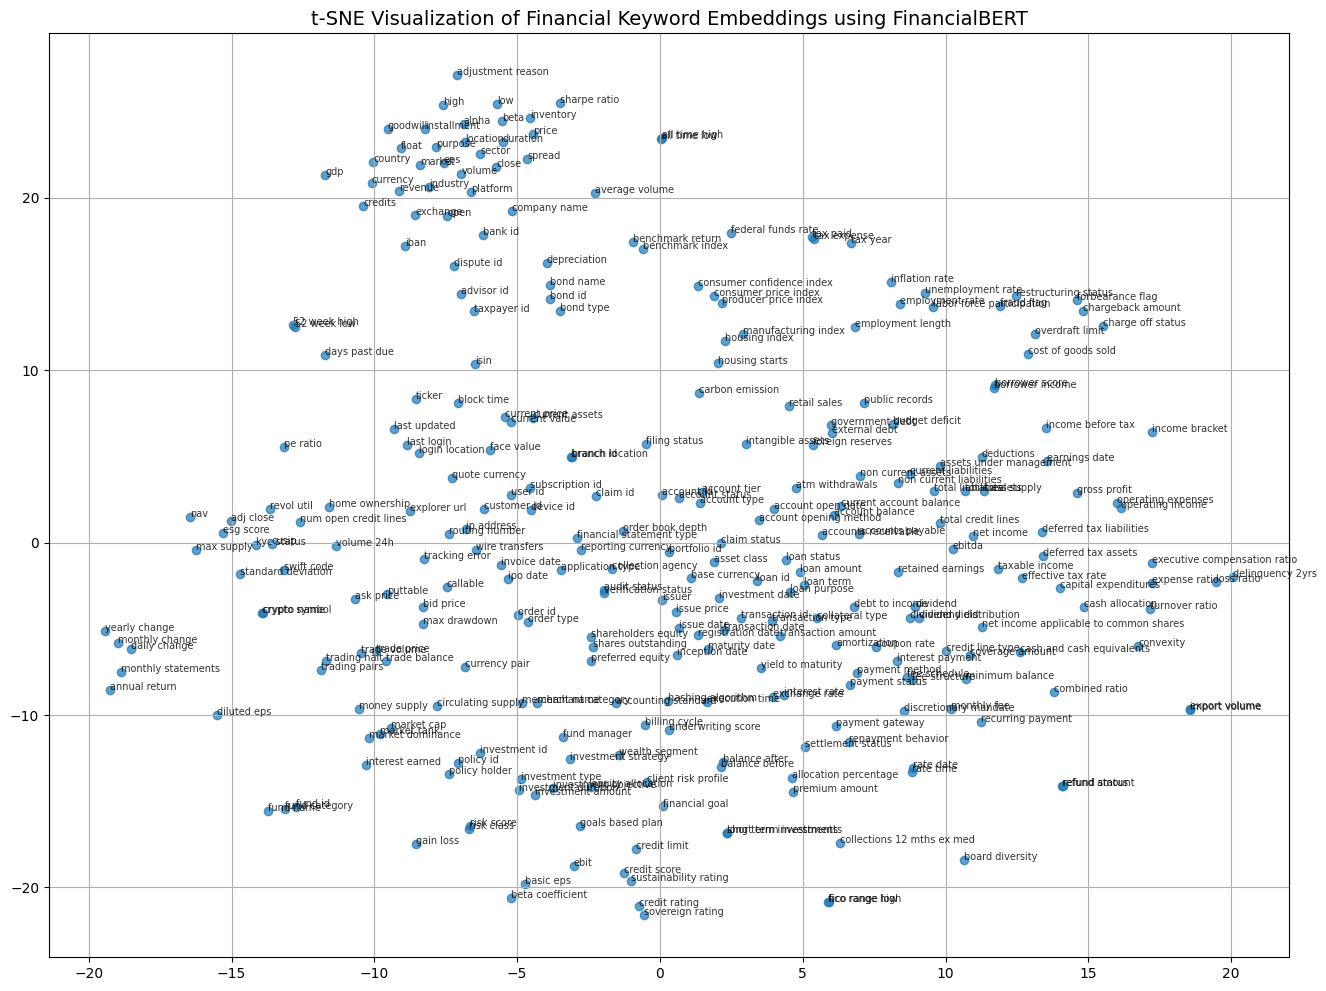

In [5]:
# Define preprocessing function
def preprocess_keyword(keyword):
    return keyword.replace("_", " ").lower()

# Preprocess training and testing features
processed_keywords = [preprocess_keyword(k) for k in Train_Features]
processed_testing_keywords = [preprocess_keyword(k) for k in Test_Features]

# Load FinancialBERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModel.from_pretrained("ProsusAI/finbert").to(device)

# Function to generate embeddings using FinancialBERT
def generate_embeddings(keywords, tokenizer, model, device):
    inputs = tokenizer(keywords, padding=True, truncation=True, return_tensors="pt", max_length=128).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
    # Use the [CLS] token embedding as the sentence representation
    cls_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()
    return cls_embeddings

# Generate embeddings for training and testing data
embeddings = generate_embeddings(processed_keywords, tokenizer, model, device)
testing_embeddings = generate_embeddings(processed_testing_keywords, tokenizer, model, device)

# Compute cosine similarity matrix
similarity_matrix = cosine_similarity(embeddings)

# Perform t-SNE visualization
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
reduced_embeddings = tsne.fit_transform(embeddings)

# Plot t-SNE visualization
plt.figure(figsize=(16, 12))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.7)

# Annotate each point with its corresponding label
for i, label in enumerate(processed_keywords):
    plt.annotate(label, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]), fontsize=7, alpha=0.8)

# Add title and grid
plt.title("t-SNE Visualization of Financial Keyword Embeddings using FinancialBERT", fontsize=14)
plt.grid(True)
plt.show()


In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()
# Initialize the SVM classifier
svm_model = SVC(kernel='rbf', random_state=42, gamma='scale')

threshold_candidates = np.arange(0.8, 0.9, 0.01)

best_threshold = None
best_f1 = 0

min_positives_ratio = 0.01
max_positives_ratio = 0.10


for threshold in threshold_candidates:
    X_temp, y_temp = [], []

    for i in range(len(embeddings)):
        for j in range(i + 1, len(embeddings)):
            vec1, vec2 = embeddings[i], embeddings[j]
            cos_sim = cosine_similarity([vec1], [vec2])[0][0]
            label = 1 if cos_sim > threshold else 0
            X_temp.append(np.concatenate([vec1, vec2]))
            y_temp.append(label)

    X_temp, y_temp = np.array(X_temp), np.array(y_temp)
    positives_ratio = np.mean(y_temp)

    # Skip thresholds with too few or too many positives
    if not (min_positives_ratio <= positives_ratio <= max_positives_ratio):
        print(f"⚠️ Skipping threshold {threshold:.3f} due to positive ratio: {positives_ratio:.4f}")
        continue

    # Split and scale
    X_train_sub, X_val_sub, y_train_sub, y_val_sub = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)
    X_train_scaled = scaler.fit_transform(X_train_sub)
    X_val_scaled = scaler.transform(X_val_sub)

    # Train and evaluate
    svm_model.fit(X_train_scaled, y_train_sub)
    y_pred_val = svm_model.predict(X_val_scaled)
    f1 = f1_score(y_val_sub, y_pred_val, zero_division=0)

    print(f"✅ Threshold: {threshold:.3f} | F1: {f1:.4f} | Positive Ratio: {positives_ratio:.4f}")

    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

if best_threshold is not None:
    print(f"\n🎯 Best Threshold Found: {best_threshold:.3f} with F1-score: {best_f1:.4f}")
else:
    print("\n❌ No valid threshold found within ratio constraints. Try adjusting the limits.")


⚠️ Skipping threshold 0.800 due to positive ratio: 0.2489
⚠️ Skipping threshold 0.810 due to positive ratio: 0.2062
⚠️ Skipping threshold 0.820 due to positive ratio: 0.1683
⚠️ Skipping threshold 0.830 due to positive ratio: 0.1335
⚠️ Skipping threshold 0.840 due to positive ratio: 0.1016


In [6]:
# Threshold for compatibility
threshold = 0.85

# Generate all possible pairs of features
X = []  # Input features (concatenated embeddings)
y = []  # Labels (1 for compatible, 0 for incompatible)

for i in range(len(embeddings)):
    for j in range(i + 1, len(embeddings)):
        combined_features = np.concatenate([embeddings[i], embeddings[j]])  # Concatenate embeddings
        X.append(combined_features)
        
        # Compute cosine similarity and assign label
        cos_sim = cosine_similarity([embeddings[i]], [embeddings[j]])[0][0]
        y.append(1 if cos_sim > threshold else 0)

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

print(f"Original pairs: {len(X)}")

Original pairs: 43071


In [7]:
def jitter_embedding(embedding, noise_level=0.05):
    noise = np.random.normal(0, noise_level, embedding.shape)
    return embedding + noise

augmented_pairs = []
augmented_labels = []

n_augments = 3  # Number of jittered copies per compatible pair

for i in range(len(embeddings)):
    for j in range(i + 1, len(embeddings)):
        sim = cosine_similarity([embeddings[i]], [embeddings[j]])[0][0]
        if sim > threshold:
            for _ in range(n_augments):
                vec1_jit = jitter_embedding(embeddings[i])
                vec2_jit = jitter_embedding(embeddings[j])
                augmented_pairs.append(np.concatenate([vec1_jit, vec2_jit]))
                augmented_pairs.append(np.concatenate([embeddings[i], vec2_jit]))
                augmented_pairs.append(np.concatenate([vec1_jit, embeddings[j]]))
                augmented_labels.extend([1, 1, 1])



print(f"Augmented pairs: {len(augmented_pairs)}")
print(f"Original pairs: {len(X)}")
# Combine original and augmented data
X_combined = np.vstack([X, np.array(augmented_pairs)])
y_combined = np.concatenate([y, np.array(augmented_labels)])

Augmented pairs: 29169
Original pairs: 43071


In [8]:
# Threshold for compatibility
threshold = 0.85

# Generate all possible pairs of features
X_Test = []  # Input features (concatenated embeddings)
y_test = []  # Labels (1 for compatible, 0 for incompatible)

for i in range(len(testing_embeddings)):
    for j in range(i + 1, len(testing_embeddings)):
        combined_features = np.concatenate([testing_embeddings[i], testing_embeddings[j]])  # Concatenate embeddings
        X_Test.append(combined_features)
        
        # Compute cosine similarity and assign label
        cos_sim = cosine_similarity([testing_embeddings[i]], [testing_embeddings[j]])[0][0]
        y_test.append(1 if cos_sim > threshold else 0)

# Convert to NumPy arrays
X_Test = np.array(X_Test)
y_test = np.array(y_test)

In [9]:
augmented_pairs = []
augmented_labels = []

n_augments = 3  # Number of jittered copies per compatible pair

for i in range(len(testing_embeddings)):
    for j in range(i + 1, len(testing_embeddings)):
        sim = cosine_similarity([testing_embeddings[i]], [testing_embeddings[j]])[0][0]
        if sim > threshold:
            for _ in range(n_augments):
                vec1_jit = jitter_embedding(testing_embeddings[i])
                vec2_jit = jitter_embedding(testing_embeddings[j])
                augmented_pairs.append(np.concatenate([vec1_jit, vec2_jit]))
                augmented_pairs.append(np.concatenate([testing_embeddings[i], vec2_jit]))
                augmented_pairs.append(np.concatenate([vec1_jit, testing_embeddings[j]]))
                augmented_labels.extend([1, 1, 1])


print(f"Augmented pairs: {len(augmented_pairs)}")
print(f"Original pairs: {len(X_Test)}")
# Combine original and augmented data
X_Test_combined = np.vstack([X_Test, np.array(augmented_pairs)])
y_Test_combined = np.concatenate([y_test, np.array(augmented_labels)])

Augmented pairs: 621
Original pairs: 1225


In [10]:
scaler = StandardScaler()
# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_combined)
X_test_scaled = scaler.transform(X_Test_combined)

In [ ]:
# Define parameter grid for multiple kernels
param_grid = [
    {
        'kernel': ['linear'],
        'C': [0.1, 1, 10]
    },
    {
        'kernel': ['rbf'],
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto', 0.1, 1]
    },
    {
        'kernel': ['poly'],
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto', 0.1, 1],
        'degree': [2, 3, 4]
    }
]

# Initialize the Grid Search
svm = SVC(random_state=42)

grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    cv=2,
    scoring='f1',
    verbose=2,
    n_jobs=-1
)

# Run the grid search
grid_search.fit(X_train_scaled, y)

results = grid_search.cv_results_
for mean, std, params in zip(results['mean_test_score'], results['std_test_score'], results['params']):
    print(f"✔️ Params: {params} | Recall: {mean:.4f} (+/- {std:.4f})")

# Output best model
print(f"\n✅ Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_


In [58]:
# Define parameter grid for multiple kernels
param_grid = [
    {
        'kernel': ['rbf'],
        'C': list(range(1, 16, 1)),
        'gamma': ['scale', 'auto']
    },
    {
        'kernel': ['poly'],
        'C': list(range(1, 16, 1)),
        'gamma': ['scale', 'auto'],
        'degree': [2, 3]
    }
]

# Initialize the Grid Search
svm = SVC(random_state=42)

grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    cv=2,
    scoring='recall',
    verbose=2,
    n_jobs=-1
)

# Run the grid search
grid_search.fit(X_train_scaled, y_combined)

results = grid_search.cv_results_
for mean, std, params in zip(results['mean_test_score'], results['std_test_score'], results['params']):
    print(f"✔️ Params: {params} | Recall: {mean:.4f} (+/- {std:.4f})")

# Output best model
print(f"\n✅ Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_


Fitting 2 folds for each of 90 candidates, totalling 180 fits


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

[CV] END ........................C=2, gamma=auto, kernel=rbf; total time=59.2min
[CV] END .......................C=2, gamma=scale, kernel=rbf; total time=60.0min
[CV] END ........................C=6, gamma=auto, kernel=rbf; total time=60.3min
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time=60.4min
[CV] END .......................C=5, gamma=scale, kernel=rbf; total time=60.6min
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=60.7min
[CV] END .......................C=6, gamma=scale, kernel=rbf; total time=60.8min
[CV] END .......................C=4, gamma=scale, kernel=rbf; total time=60.9min
[CV] END ........................C=4, gamma=auto, kernel=rbf; total time=61.1min
[CV] END .......................C=2, gamma=scale, kernel=rbf; total time=71.5min
[CV] END .......................C=3, gamma=scale, kernel=rbf; total time=71.6min
[CV] END ........................C=3, gamma=auto, kernel=rbf; total time=71.7min
[CV] END ...................

In [ ]:
# model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
# model.fit(X_train_scaled, y_combined)

# Predict using best model
y_pred = best_model.predict(X_test_scaled)

# Evaluation
print("\n📊 Classification Report (Test Set):")
print(classification_report(y_Test_combined, y_pred, zero_division=0))

In [ ]:
# 1. Base estimator
xgb_base = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# 2. Parameter grid around your new “best” run
param_grid = {
    'n_estimators':       [150, 200, 250],
    'learning_rate':      [0.01, 0.03, 0.05],
    'max_depth':          [4, 6, 8],
    'min_child_weight':   [1, 3, 5],
    'subsample':          [0.7, 0.9, 1.0],
    'colsample_bytree':   [0.6, 0.8, 1.0],
    'gamma':              [0.0, 0.1, 0.2],
    'reg_alpha':          [0.0, 0.2, 0.4],
    'reg_lambda':         [0.8, 1.0, 1.2],
    # ratio = (# negative samples) / (# positive samples)
    'scale_pos_weight':   [1, (len(y_combined) - sum(y_combined)) / sum(y_combined)]
}

# Make a scorer that focuses on recall for label=1
recall_pos1 = make_scorer(recall_score, pos_label=1)

# 3. Grid Search (optimize for accuracy; swap scoring to 'recall' if you still want to boost class-1 recall)
grid_search = GridSearchCV(
    estimator   = xgb_base,
    param_grid  = param_grid,
    scoring     = 'recall_pos1',
    cv          = 2,
    n_jobs      = -1,
    verbose     = 1,
    refit       = True
)


# 4. Run the search
grid_search.fit(X_train_scaled, y_combined)

# 5. Best params & CV score
print("🏆 Best parameters found:")
print(grid_search.best_params_)
print(f"Best CV accuracy: {grid_search.best_score_:.4f}\n")

# 6. Test‐set evaluation
y_pred = grid_search.predict(X_test_scaled)
print("📊 Classification Report on TEST:")
print(classification_report(y_Test_combined, y_pred, zero_division=0))


Fitting 2 folds for each of 1024 candidates, totalling 2048 fits


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.932, test=0.940) total time= 2.1min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.933, test=0.939) total time= 2.1min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.932, test=0.941) total time= 2.1min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.932, test=0.941) total time= 2.2min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=

/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:18:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.957, test=0.776) total time= 2.2min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.939, test=0.709) total time= 2.3min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.959, test=0.780) total time= 2.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:18:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.940, test=0.726) total time= 2.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:18:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.942, test=0.729) total time= 2.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:18:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.943, test=0.731) total time= 2.3min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.941, test=0.732) total time= 2.3min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.956, test=0.766) total time= 2.3min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.957, test=0.786) total time= 2.3min
[CV 1/2] END colsample_byt

/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:18:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.958, test=0.780) total time= 2.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:18:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:18:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:18:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:18:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop

[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.935, test=0.944) total time= 2.0min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.932, test=0.940) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.941, test=0.730) total time= 2.2min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.954, test=0.960) total time= 2.1min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.955, test=0.956) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:20:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.940, test=0.708) total time= 2.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:20:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:20:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:20:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:20:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.956, test=0.780) total time= 2.3min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.956, test=0.768) total time= 2.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:20:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:20:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:20:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.940, test=0.954) total time= 2.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.939, test=0.953) total time= 2.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.940, test=0.951) total time= 2.5min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.958, test=0.965) total time= 2.7min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.958, test=0.964) total time= 2.6min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.959, test=0.965) total time= 2.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.941, test=0.953) total time= 2.7min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.956, test=0.963) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:21:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:21:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:21:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.950, test=0.755) total time= 2.8min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:21:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:21:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:21:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.951, test=0.754) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:21:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.965, test=0.801) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.950, test=0.738) total time= 2.8min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.966, test=0.796) total time= 2.9min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.952, test=0.754) total time= 2.9min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.966, test=0.807) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:21:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:21:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.964, test=0.789) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:21:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:21:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:21:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:21:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop

[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.941, test=0.954) total time= 2.5min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.938, test=0.953) total time= 2.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:23:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.957, test=0.963) total time= 2.6min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.952, test=0.752) total time= 2.8min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.958, test=0.963) total time= 2.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:23:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:23:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:23:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.932, test=0.942) total time= 2.1min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.964, test=0.798) total time= 2.9min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.954, test=0.763) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:23:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.933, test=0.939) total time= 2.1min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.939, test=0.719) total time= 2.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:23:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.965, test=0.796) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:23:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.954, test=0.957) total time= 2.1min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.955, test=0.787) total time= 2.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:23:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.954, test=0.954) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:23:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.956, test=0.764) total time= 2.2min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.942, test=0.734) total time= 2.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:23:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:23:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:23:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.941, test=0.953) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:23:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:23:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:23:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:23:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.939, test=0.949) total time= 2.6min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.959, test=0.966) total time= 2.6min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.959, test=0.965) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:23:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:23:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:23:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.951, test=0.736) total time= 2.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:23:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.951, test=0.752) total time= 2.9min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.963, test=0.801) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:24:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.965, test=0.791) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:24:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:24:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:24:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.939, test=0.719) total time= 2.2min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.932, test=0.939) total time= 2.1min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.933, test=0.937) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:25:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.955, test=0.957) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:25:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.938, test=0.718) total time= 2.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:25:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.954, test=0.765) total time= 2.2min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.955, test=0.955) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:25:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.932, test=0.941) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:25:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.957, test=0.771) total time= 2.2min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.941, test=0.736) total time= 2.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:25:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:25:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.933, test=0.938) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:25:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.956, test=0.958) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:25:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.953, test=0.957) total time= 2.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.932, test=0.939) total time= 2.0min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.940, test=0.714) total time= 2.2min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.955, test=0.781) total time= 2.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:25:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.936, test=0.947) total time= 2.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.955, test=0.767) total time= 2.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:25:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:25:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:25:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.942, test=0.737) total time= 2.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:25:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:26:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:26:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:26:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.942, test=0.726) total time= 2.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:26:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:26:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.953, test=0.956) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:26:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.957, test=0.782) total time= 2.2min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.954, test=0.955) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:26:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.957, test=0.771) total time= 2.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:26:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:26:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:26:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.939, test=0.953) total time= 2.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.940, test=0.950) total time= 2.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:28:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.960, test=0.965) total time= 2.6min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.949, test=0.749) total time= 2.9min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.952, test=0.753) total time= 2.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:28:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.957, test=0.964) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:28:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.939, test=0.948) total time= 2.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:28:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:28:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.962, test=0.809) total time= 2.9min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.939, test=0.953) total time= 2.6min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.964, test=0.793) total time= 2.8min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.958, test=0.964) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:28:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.960, test=0.963) total time= 2.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.939, test=0.953) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:28:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:28:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:28:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:28:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop

[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.950, test=0.747) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:28:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:28:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.941, test=0.952) total time= 2.6min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.948, test=0.746) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.962, test=0.785) total time= 2.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:28:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:28:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.963, test=0.793) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:28:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:28:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.950, test=0.760) total time= 2.9min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.958, test=0.963) total time= 2.6min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.951, test=0.741) total time= 2.9min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.960, test=0.965) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:28:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:28:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.964, test=0.803) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:29:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:29:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:29:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.963, test=0.789) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:29:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:29:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.943, test=0.956) total time= 2.7min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.939, test=0.951) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:30:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.957, test=0.963) total time= 2.7min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.951, test=0.756) total time= 3.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:31:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.959, test=0.962) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:31:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:31:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.951, test=0.751) total time= 3.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:31:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.979, test=0.973) total time= 2.9min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.965, test=0.800) total time= 3.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:31:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.964, test=0.789) total time= 3.0min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.979, test=0.971) total time= 3.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:31:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:31:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:31:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.989, test=0.980) total time= 3.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:31:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.988, test=0.980) total time= 3.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:31:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.991, test=0.830) total time= 3.3min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.989, test=0.812) total time= 3.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.979, test=0.969) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.980, test=0.973) total time= 3.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:31:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.988, test=0.978) total time= 2.9min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.995, test=0.849) total time= 3.4min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:31:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:31:

[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.990, test=0.827) total time= 3.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:32:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:32:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.995, test=0.828) total time= 3.4min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.987, test=0.979) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.988, test=0.813) total time= 3.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:32:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:32:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:32:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.996, test=0.834) total time= 3.4min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:32:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.995, test=0.831) total time= 3.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:32:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:32:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.980, test=0.971) total time= 3.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.979, test=0.971) total time= 3.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:34:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.991, test=0.810) total time= 3.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:34:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.988, test=0.980) total time= 3.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:34:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.988, test=0.817) total time= 3.4min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.988, test=0.979) total time= 3.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:34:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:34:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.980, test=0.973) total time= 3.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:34:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.996, test=0.839) total time= 3.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.978, test=0.971) total time= 3.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.995, test=0.832) total time= 3.4min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:34:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:34:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.991, test=0.828) total time= 3.4min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.988, test=0.979) total time= 3.0min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.988, test=0.980) total time= 3.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:34:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:34:

[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.988, test=0.805) total time= 3.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:34:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:35:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.995, test=0.822) total time= 3.4min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.995, test=0.842) total time= 3.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:35:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:35:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.982, test=0.977) total time= 3.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:35:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.982, test=0.976) total time= 3.7min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.991, test=0.984) total time= 3.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:35:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.989, test=0.983) total time= 3.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:36:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:36:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.996, test=0.843) total time= 4.4min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.993, test=0.827) total time= 4.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:36:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.997, test=0.860) total time= 4.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:36:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:36:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.998, test=0.843) total time= 4.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:36:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.984, test=0.977) total time= 3.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:37:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.981, test=0.976) total time= 3.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.991, test=0.983) total time= 3.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:38:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.994, test=0.843) total time= 4.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:38:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.989, test=0.982) total time= 3.7min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.993, test=0.829) total time= 4.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:38:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.984, test=0.977) total time= 3.7min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.981, test=0.976) total time= 3.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:38:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:38:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:38:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:38:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.998, test=0.846) total time= 4.4min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.990, test=0.983) total time= 3.8min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.997, test=0.845) total time= 4.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:38:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:38:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:38:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.989, test=0.983) total time= 3.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.993, test=0.835) total time= 4.3min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.995, test=0.830) total time= 4.4min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.998, test=0.854) total time= 4.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.998, test=0.850) total time= 4.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.984, test=0.977) total time= 3.8min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.981, test=0.976) total time= 3.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.995, test=0.845) total time= 4.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.991, test=0.983) total time= 3.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.994, test=0.829) total time= 4.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.989, test=0.983) total time= 3.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.998, test=0.858) total time= 4.4min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.998, test=0.837) total time= 4.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.979, test=0.971) total time= 3.0min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.989, test=0.812) total time= 3.4min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.977, test=0.970) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.987, test=0.977) total time= 3.0min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.988, test=0.977) total time= 3.0min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.989, test=0.801) total time= 3.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.996, test=0.845) total time= 3.4min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.979, test=0.971) total time= 3.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.995, test=0.830) total time= 3.4min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.978, test=0.970) total time= 3.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.987, test=0.977) total time= 3.0min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.988, test=0.807) total time= 3.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.988, test=0.822) total time= 3.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.989, test=0.976) total time= 3.0min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.995, test=0.838) total time= 3.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.995, test=0.824) total time= 3.5min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.978, test=0.969) total time= 3.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.977, test=0.972) total time= 3.0min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.990, test=0.812) total time= 3.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.988, test=0.811) total time= 3.4min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.988, test=0.978) total time= 3.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.988, test=0.978) total time= 3.0min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.997, test=0.839) total time= 3.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.977, test=0.968) total time= 3.0min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.996, test=0.824) total time= 3.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:44:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:44:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.977, test=0.968) total time= 3.0min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.990, test=0.816) total time= 3.4min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.989, test=0.807) total time= 3.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:44:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.987, test=0.977) total time= 3.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:44:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:44:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:44:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.987, test=0.977) total time= 3.0min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.995, test=0.837) total time= 3.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:45:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:45:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.994, test=0.827) total time= 3.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:45:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.982, test=0.976) total time= 3.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.979, test=0.976) total time= 3.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:45:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:46:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.990, test=0.982) total time= 3.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.994, test=0.830) total time= 4.3min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.994, test=0.820) total time= 4.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.988, test=0.981) total time= 3.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:46:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:46:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:46:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:46:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.999, test=0.859) total time= 4.4min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.983, test=0.975) total time= 3.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:46:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.997, test=0.845) total time= 4.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:46:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:47:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.980, test=0.974) total time= 3.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.994, test=0.839) total time= 4.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:47:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:47:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.993, test=0.821) total time= 4.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:47:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.990, test=0.981) total time= 3.8min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.998, test=0.851) total time= 4.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.990, test=0.980) total time= 3.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:47:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:47:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:47:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.982, test=0.975) total time= 3.7min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.998, test=0.838) total time= 4.4min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.979, test=0.976) total time= 3.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:48:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:48:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:48:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.995, test=0.831) total time= 4.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:48:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.990, test=0.981) total time= 3.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.993, test=0.823) total time= 4.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:48:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:48:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.990, test=0.982) total time= 3.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.999, test=0.854) total time= 4.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:49:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.957, test=0.766) total time= 2.2min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.948, test=0.960) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:49:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:49:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:49:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.956, test=0.787) total time= 2.2min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.998, test=0.848) total time= 4.3min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.949, test=0.959) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:49:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:49:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:49:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.981, test=0.975) total time= 3.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:49:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.962, test=0.967) total time= 2.0min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.970, test=0.814) total time= 2.2min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.980, test=0.975) total time= 3.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:49:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:49:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.962, test=0.970) total time= 1.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:49:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.989, test=0.981) total time= 3.6min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.994, test=0.835) total time= 4.2min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.970, test=0.812) total time= 2.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:50:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:50:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:50:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:50:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.947, test=0.958) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:50:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.957, test=0.773) total time= 2.2min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.988, test=0.982) total time= 3.6min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.994, test=0.827) total time= 4.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:50:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.957, test=0.769) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:50:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.945, test=0.957) total time= 1.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:50:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.998, test=0.849) total time= 4.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:50:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:50:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:50:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.969, test=0.819) total time= 2.1min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.998, test=0.841) total time= 4.2min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.964, test=0.967) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:50:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:51:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:51:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.961, test=0.970) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:51:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.969, test=0.806) total time= 2.2min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.950, test=0.962) total time= 1.9min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.956, test=0.773) total time= 2.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.947, test=0.960) total time= 1.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:51:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:51:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:51:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.956, test=0.779) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:51:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:51:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.961, test=0.969) total time= 1.9min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.968, test=0.817) total time= 2.1min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.961, test=0.969) total time= 1.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:51:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:51:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.968, test=0.809) total time= 2.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:51:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.946, test=0.959) total time= 1.9min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.950, test=0.958) total time= 1.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:52:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:52:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.957, test=0.774) total time= 2.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:52:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.957, test=0.776) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:52:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:52:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.970, test=0.819) total time= 2.1min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.960, test=0.967) total time= 1.9min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.958, test=0.968) total time= 1.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:52:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:52:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:52:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.967, test=0.795) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:52:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.956, test=0.968) total time= 2.4min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.955, test=0.966) total time= 2.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:53:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.967, test=0.798) total time= 2.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.966, test=0.807) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:53:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.967, test=0.975) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:53:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:53:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.978, test=0.840) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:53:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.953, test=0.967) total time= 2.4min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.966, test=0.975) total time= 2.4min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:53:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.977, test=0.831) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:53:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:53:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.951, test=0.967) total time= 2.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:53:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.967, test=0.805) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:53:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.965, test=0.795) total time= 2.6min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.968, test=0.974) total time= 2.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:54:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:54:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:54:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.966, test=0.974) total time= 2.4min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.977, test=0.844) total time= 2.7min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.957, test=0.968) total time= 2.4min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.976, test=0.826) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:54:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:54:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:54:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.952, test=0.965) total time= 2.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:54:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.965, test=0.796) total time= 2.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:54:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.967, test=0.974) total time= 2.4min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.965, test=0.796) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:54:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:54:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:54:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.977, test=0.840) total time= 2.7min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.966, test=0.973) total time= 2.4min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.976, test=0.831) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:55:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:55:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:55:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.953, test=0.967) total time= 2.4min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.957, test=0.967) total time= 2.5min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.968, test=0.794) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:55:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:55:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.949, test=0.958) total time= 2.0min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.957, test=0.790) total time= 2.1min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.966, test=0.801) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:55:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.943, test=0.960) total time= 1.9min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.967, test=0.974) total time= 2.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:55:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:55:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.955, test=0.773) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:56:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:56:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.964, test=0.973) total time= 2.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:56:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.977, test=0.834) total time= 2.7min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.969, test=0.814) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:56:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:56:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.963, test=0.968) total time= 1.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:56:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.975, test=0.821) total time= 2.6min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.962, test=0.971) total time= 1.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:56:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:56:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:56:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:56:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.951, test=0.960) total time= 2.0min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.969, test=0.814) total time= 2.1min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.956, test=0.768) total time= 2.1min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.944, test=0.958) total time= 1.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:56:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:56:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:56:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.957, test=0.780) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:56:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:56:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.968, test=0.822) total time= 2.1min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.961, test=0.968) total time= 1.9min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.960, test=0.971) total time= 1.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:57:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:57:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:57:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.968, test=0.804) total time= 2.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:57:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.947, test=0.961) total time= 1.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:57:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.945, test=0.960) total time= 1.9min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.956, test=0.764) total time= 2.1min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.961, test=0.969) total time= 1.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.960, test=0.969) total time= 1.9min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.957, test=0.779) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:57:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:57:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.968, test=0.814) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:57:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.950, test=0.962) total time= 1.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:57:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:58:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.970, test=0.808) total time= 2.1min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.946, test=0.957) total time= 1.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:58:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:58:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:58:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:58:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.961, test=0.968) total time= 1.9min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.959, test=0.780) total time= 2.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.956, test=0.782) total time= 2.1min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.968, test=0.824) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:58:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:58:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.968, test=0.787) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:58:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.960, test=0.970) total time= 1.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:58:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:58:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:58:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.955, test=0.969) total time= 2.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:59:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.951, test=0.968) total time= 2.4min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.966, test=0.806) total time= 2.6min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.965, test=0.797) total time= 2.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:59:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:59:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.968, test=0.974) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:59:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:59:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.966, test=0.976) total time= 2.4min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.977, test=0.830) total time= 2.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.977, test=0.831) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:59:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:59:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:59:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.950, test=0.965) total time= 2.4min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.955, test=0.968) total time= 2.5min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.967, test=0.794) total time= 2.7min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.966, test=0.973) total time= 2.4min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:00:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:00:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.966, test=0.975) total time= 2.4min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:00:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.964, test=0.803) total time= 2.6min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.953, test=0.969) total time= 2.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:00:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:00:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.975, test=0.840) total time= 2.7min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.953, test=0.968) total time= 2.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:00:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:00:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.976, test=0.831) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:00:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:00:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.966, test=0.794) total time= 2.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:00:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.969, test=0.975) total time= 2.5min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.965, test=0.975) total time= 2.4min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.965, test=0.800) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:00:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:00:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.975, test=0.835) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:00:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:01:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.975, test=0.829) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:01:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:01:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.952, test=0.965) total time= 2.4min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.956, test=0.969) total time= 2.6min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.966, test=0.803) total time= 2.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:01:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:01:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.963, test=0.802) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:01:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:02:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.965, test=0.973) total time= 2.5min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.966, test=0.974) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:02:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.975, test=0.842) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:02:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:02:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.976, test=0.805) total time= 2.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:02:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.986, test=0.978) total time= 2.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.984, test=0.977) total time= 2.7min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.991, test=0.985) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:03:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:03:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:03:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.986, test=0.979) total time= 2.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.990, test=0.984) total time= 2.7min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.996, test=0.838) total time= 3.1min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.997, test=0.857) total time= 3.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:03:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:03:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:03:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.998, test=0.850) total time= 3.0min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.999, test=0.863) total time= 3.1min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.984, test=0.979) total time= 2.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:03:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.992, test=0.984) total time= 2.7min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.995, test=0.844) total time= 3.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:03:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:03:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:03:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.989, test=0.983) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:03:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:03:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:03:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.998, test=0.855) total time= 3.0min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.997, test=0.837) total time= 3.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:03:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:04:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.999, test=0.860) total time= 3.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:04:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.984, test=0.977) total time= 2.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.984, test=0.976) total time= 2.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:04:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:04:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.995, test=0.831) total time= 3.0min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.997, test=0.844) total time= 3.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:04:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.991, test=0.985) total time= 2.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:05:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:05:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.990, test=0.984) total time= 2.7min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.998, test=0.850) total time= 3.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:05:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:05:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.999, test=0.845) total time= 3.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:05:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.985, test=0.978) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:05:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.997, test=0.844) total time= 3.1min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.985, test=0.979) total time= 2.7min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.991, test=0.983) total time= 2.7min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.996, test=0.834) total time= 3.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.990, test=0.983) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:06:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:06:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:06:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:06:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop

[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.998, test=0.841) total time= 3.1min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.999, test=0.854) total time= 3.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:06:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:06:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.991, test=0.983) total time= 3.4min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.988, test=0.982) total time= 3.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:07:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:07:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.994, test=0.987) total time= 3.4min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.998, test=0.852) total time= 3.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.999, test=0.874) total time= 3.8min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.993, test=0.988) total time= 3.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:07:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=1.000, test=0.879) total time= 3.8min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:07:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:07:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:07:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.999, test=0.854) total time= 3.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:07:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:07:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.991, test=0.984) total time= 3.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:08:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.988, test=0.983) total time= 3.3min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.998, test=0.861) total time= 3.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:08:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:08:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.998, test=0.850) total time= 3.7min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.995, test=0.988) total time= 3.4min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:08:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.999, test=0.867) total time= 3.8min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:08:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.992, test=0.986) total time= 3.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:08:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:08:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=1.000, test=0.872) total time= 3.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:09:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.988, test=0.981) total time= 3.3min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.990, test=0.983) total time= 3.4min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.999, test=0.858) total time= 3.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:09:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.995, test=0.987) total time= 3.4min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:09:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:09:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.998, test=0.848) total time= 3.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:09:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.993, test=0.987) total time= 3.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:09:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:09:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=1.000, test=0.868) total time= 3.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:10:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=1.000, test=0.856) total time= 3.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.990, test=0.983) total time= 3.4min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:10:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:10:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.988, test=0.983) total time= 3.3min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.999, test=0.861) total time= 3.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:10:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.994, test=0.988) total time= 3.4min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.984, test=0.978) total time= 2.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:10:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.993, test=0.985) total time= 3.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:11:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.996, test=0.839) total time= 3.0min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.998, test=0.843) total time= 3.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:11:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:11:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.983, test=0.977) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:11:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=1.000, test=0.876) total time= 3.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:11:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.999, test=0.854) total time= 3.7min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.997, test=0.837) total time= 3.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:11:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:11:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:11:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.992, test=0.984) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:11:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.990, test=0.983) total time= 2.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:11:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.999, test=0.855) total time= 3.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:11:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.999, test=0.869) total time= 3.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:11:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:11:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.986, test=0.978) total time= 2.7min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.985, test=0.978) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:12:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.997, test=0.843) total time= 3.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:12:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.996, test=0.836) total time= 3.0min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.992, test=0.985) total time= 2.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:12:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:12:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:12:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.999, test=0.854) total time= 3.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:12:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.990, test=0.983) total time= 2.7min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.999, test=0.850) total time= 3.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:13:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.985, test=0.978) total time= 2.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:13:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.995, test=0.837) total time= 3.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:13:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.982, test=0.976) total time= 2.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:13:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.989, test=0.983) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:13:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.992, test=0.983) total time= 2.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:13:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.995, test=0.819) total time= 3.0min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.985, test=0.978) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:13:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.999, test=0.856) total time= 3.1min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.984, test=0.977) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:14:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:14:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:14:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.999, test=0.846) total time= 3.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:14:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.995, test=0.837) total time= 3.0min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.990, test=0.983) total time= 2.6min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.995, test=0.836) total time= 3.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:14:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:14:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:14:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.990, test=0.982) total time= 2.6min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.999, test=0.843) total time= 3.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:14:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:14:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:14:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.999, test=0.851) total time= 3.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:14:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.990, test=0.984) total time= 3.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.988, test=0.981) total time= 3.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:15:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.998, test=0.863) total time= 3.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:15:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:16:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.999, test=0.846) total time= 3.6min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=1.000, test=0.870) total time= 3.6min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.995, test=0.988) total time= 3.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:16:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:16:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.993, test=0.986) total time= 3.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:16:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:16:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.999, test=0.881) total time= 3.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.990, test=0.983) total time= 3.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:16:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.989, test=0.982) total time= 3.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:16:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.999, test=0.859) total time= 3.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:17:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.993, test=0.987) total time= 3.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.999, test=0.844) total time= 3.5min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.995, test=0.988) total time= 3.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:17:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:17:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:17:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.988, test=0.981) total time= 3.1min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=1.000, test=0.873) total time= 3.6min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.990, test=0.983) total time= 3.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=1.000, test=0.855) total time= 3.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:17:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.998, test=0.860) total time= 3.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:17:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:17:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:17:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.994, test=0.987) total time= 3.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.998, test=0.829) total time= 3.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:17:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:17:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:17:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.992, test=0.987) total time= 3.0min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=1.000, test=0.868) total time= 3.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:17:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=1.000, test=0.863) total time= 3.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:18:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:18:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.940, test=0.726) total time= 2.2min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.932, test=0.941) total time= 2.1min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.990, test=0.983) total time= 3.2min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.932, test=0.940) total time= 1.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:19:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.998, test=0.854) total time= 3.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:19:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:19:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.988, test=0.981) total time= 3.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:19:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.954, test=0.957) total time= 2.0min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.942, test=0.729) total time= 2.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:19:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.957, test=0.776) total time= 2.1min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.998, test=0.845) total time= 3.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:19:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.994, test=0.988) total time= 3.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:19:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:19:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:19:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.955, test=0.957) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:19:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:19:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.933, test=0.942) total time= 2.0min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.956, test=0.765) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:19:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:19:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.943, test=0.731) total time= 2.2min
[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=1.000, test=0.864) total time= 3.4min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.934, test=0.939) total time= 2.0min
[CV 2/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.993, test=0.986) total time= 3.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:19:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.939, test=0.709) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:19:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=1.000, test=0.856) total time= 3.4min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.958, test=0.780) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:19:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:19:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:19:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.952, test=0.956) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:19:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:19:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:19:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:19:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.955, test=0.957) total time= 2.0min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.956, test=0.766) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:20:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:20:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.933, test=0.938) total time= 2.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.932, test=0.941) total time= 2.0min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.941, test=0.732) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:21:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.944, test=0.737) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:21:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.953, test=0.955) total time= 2.0min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.957, test=0.786) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:21:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.935, test=0.944) total time= 1.9min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.955, test=0.957) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:21:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:21:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:21:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:21:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.957, test=0.776) total time= 2.1min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.941, test=0.730) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:21:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.940, test=0.708) total time= 2.1min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.932, test=0.940) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:21:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:21:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:21:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.954, test=0.960) total time= 2.0min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.956, test=0.780) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:21:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.955, test=0.956) total time= 1.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:21:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:21:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.956, test=0.768) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:21:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:21:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.939, test=0.953) total time= 2.4min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.940, test=0.954) total time= 2.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:22:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.959, test=0.965) total time= 2.4min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:22:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.950, test=0.755) total time= 2.8min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:22:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.951, test=0.754) total time= 2.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.965, test=0.801) total time= 2.7min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.959, test=0.964) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:22:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:22:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:22:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:22:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.965, test=0.795) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:22:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.941, test=0.953) total time= 2.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.940, test=0.951) total time= 2.4min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.956, test=0.963) total time= 2.4min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.958, test=0.964) total time= 2.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:23:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:23:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:23:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.952, test=0.754) total time= 2.7min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.950, test=0.738) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:23:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.964, test=0.789) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:23:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:23:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.940, test=0.953) total time= 2.5min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.938, test=0.952) total time= 2.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.966, test=0.807) total time= 2.7min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.957, test=0.962) total time= 2.4min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.952, test=0.755) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:23:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:24:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:24:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:24:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.953, test=0.761) total time= 2.7min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.958, test=0.963) total time= 2.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:24:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:24:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:24:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.964, test=0.798) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:24:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.965, test=0.796) total time= 2.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:24:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:24:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.942, test=0.953) total time= 2.5min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.951, test=0.752) total time= 2.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:24:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.939, test=0.949) total time= 2.5min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.950, test=0.737) total time= 2.6min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.959, test=0.966) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:25:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:25:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:25:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.959, test=0.965) total time= 2.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:25:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.963, test=0.801) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:25:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.965, test=0.791) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:25:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:25:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.932, test=0.940) total time= 2.0min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.933, test=0.938) total time= 1.9min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.942, test=0.734) total time= 2.1min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.939, test=0.719) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:25:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.953, test=0.956) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:25:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:25:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.955, test=0.787) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:25:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.953, test=0.954) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:25:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.932, test=0.939) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:25:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.933, test=0.938) total time= 1.9min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.956, test=0.764) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:25:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.939, test=0.719) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:26:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.938, test=0.718) total time= 2.0min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.955, test=0.957) total time= 1.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:26:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:26:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:26:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:26:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop

[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.954, test=0.765) total time= 2.1min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.957, test=0.771) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:26:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.955, test=0.953) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:26:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:26:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.932, test=0.941) total time= 1.9min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.941, test=0.736) total time= 2.1min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.932, test=0.939) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:26:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.940, test=0.714) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:27:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:27:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.953, test=0.957) total time= 2.0min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.955, test=0.781) total time= 2.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:27:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.956, test=0.957) total time= 1.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:27:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:27:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:27:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.955, test=0.767) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:27:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.937, test=0.947) total time= 2.0min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.932, test=0.941) total time= 2.0min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.942, test=0.737) total time= 2.1min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.942, test=0.726) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:27:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.953, test=0.956) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:27:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:27:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.957, test=0.782) total time= 2.1min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.954, test=0.955) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:27:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:27:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.957, test=0.771) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:28:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:28:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:28:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.940, test=0.953) total time= 2.5min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.940, test=0.951) total time= 2.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:28:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:28:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.959, test=0.963) total time= 2.5min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.949, test=0.749) total time= 2.8min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.952, test=0.753) total time= 2.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.962, test=0.809) total time= 2.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.957, test=0.964) total time= 2.4min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:28:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:28:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:28:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.963, test=0.789) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:29:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.939, test=0.953) total time= 2.5min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.940, test=0.949) total time= 2.5min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.950, test=0.747) total time= 2.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:29:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:29:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.948, test=0.747) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:29:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.959, test=0.964) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:29:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:29:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.958, test=0.962) total time= 2.5min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.963, test=0.793) total time= 2.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.963, test=0.793) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:29:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:29:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:30:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.939, test=0.952) total time= 2.4min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.939, test=0.953) total time= 2.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:30:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:30:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.950, test=0.760) total time= 2.7min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.959, test=0.963) total time= 2.5min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.951, test=0.739) total time= 2.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.960, test=0.964) total time= 2.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:30:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:30:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.964, test=0.803) total time= 2.8min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:30:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:30:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.963, test=0.789) total time= 2.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:30:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:30:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.943, test=0.955) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:31:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.951, test=0.756) total time= 2.8min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.941, test=0.951) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:31:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:31:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.957, test=0.963) total time= 2.6min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.951, test=0.751) total time= 2.8min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:31:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.957, test=0.962) total time= 2.5min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.965, test=0.800) total time= 2.8min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.964, test=0.789) total time= 2.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:31:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:31:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:31:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:31:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.979, test=0.973) total time= 2.8min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:32:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.979, test=0.971) total time= 2.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:32:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.991, test=0.829) total time= 3.2min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.989, test=0.812) total time= 3.1min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.989, test=0.979) total time= 2.8min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.988, test=0.981) total time= 2.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:32:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:32:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:32:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:32:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.995, test=0.853) total time= 3.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.979, test=0.972) total time= 2.8min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.995, test=0.827) total time= 3.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:33:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:33:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.979, test=0.972) total time= 2.8min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:33:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.988, test=0.979) total time= 2.8min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.990, test=0.827) total time= 3.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:33:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:33:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:33:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.988, test=0.979) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.989, test=0.814) total time= 3.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:33:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.996, test=0.833) total time= 3.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:33:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.994, test=0.829) total time= 3.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:33:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:33:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.980, test=0.970) total time= 2.8min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.991, test=0.811) total time= 3.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:34:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.979, test=0.971) total time= 2.8min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:34:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.989, test=0.812) total time= 3.2min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.989, test=0.979) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:34:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.987, test=0.978) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:34:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:34:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:34:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.996, test=0.840) total time= 3.3min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.994, test=0.829) total time= 3.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:34:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:35:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.979, test=0.972) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:35:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.988, test=0.978) total time= 2.8min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.978, test=0.971) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.990, test=0.824) total time= 3.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:35:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:35:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:35:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.988, test=0.804) total time= 3.2min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.987, test=0.978) total time= 2.9min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.995, test=0.835) total time= 3.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:36:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:36:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:36:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.995, test=0.825) total time= 3.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:36:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.982, test=0.977) total time= 3.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:36:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.983, test=0.976) total time= 3.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:37:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.991, test=0.983) total time= 3.6min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.995, test=0.844) total time= 4.1min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.988, test=0.983) total time= 3.4min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:37:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:37:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.993, test=0.829) total time= 4.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:37:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:37:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.998, test=0.867) total time= 4.1min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.984, test=0.977) total time= 3.5min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.997, test=0.845) total time= 4.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:37:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:37:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:37:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.982, test=0.977) total time= 3.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:38:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.995, test=0.841) total time= 4.1min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.990, test=0.983) total time= 3.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:38:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:38:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.994, test=0.830) total time= 4.1min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.989, test=0.982) total time= 3.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:38:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:38:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.998, test=0.851) total time= 4.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:38:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.998, test=0.848) total time= 4.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:39:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.985, test=0.977) total time= 3.5min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.981, test=0.975) total time= 3.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:39:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:39:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.990, test=0.983) total time= 3.4min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.995, test=0.829) total time= 4.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:39:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.993, test=0.831) total time= 4.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:39:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.989, test=0.983) total time= 3.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:39:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:39:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.998, test=0.852) total time= 4.1min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.997, test=0.838) total time= 4.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:40:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:40:

[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.984, test=0.977) total time= 3.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:40:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.981, test=0.977) total time= 3.5min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.995, test=0.843) total time= 4.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:40:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.978, test=0.969) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.990, test=0.982) total time= 3.5min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.977, test=0.971) total time= 2.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:40:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:41:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:41:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.989, test=0.808) total time= 3.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:41:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.989, test=0.982) total time= 3.4min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.993, test=0.828) total time= 4.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:41:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.986, test=0.978) total time= 2.8min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.988, test=0.802) total time= 3.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.998, test=0.853) total time= 4.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:41:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:41:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:41:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:41:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop

[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.995, test=0.844) total time= 3.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.997, test=0.839) total time= 4.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.988, test=0.978) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:41:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.995, test=0.830) total time= 3.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:41:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:41:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.979, test=0.969) total time= 2.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:42:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:42:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.977, test=0.971) total time= 2.8min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.988, test=0.811) total time= 3.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:42:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.989, test=0.804) total time= 3.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:42:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.988, test=0.978) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:42:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:42:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.996, test=0.836) total time= 3.3min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.989, test=0.976) total time= 2.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:42:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:43:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.995, test=0.825) total time= 3.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:43:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.978, test=0.970) total time= 2.8min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.977, test=0.970) total time= 2.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:43:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.989, test=0.816) total time= 3.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:43:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.988, test=0.978) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:43:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:43:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.988, test=0.806) total time= 3.2min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.977, test=0.968) total time= 2.8min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.987, test=0.977) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:44:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.978, test=0.969) total time= 2.8min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:44:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.996, test=0.836) total time= 3.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:44:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.996, test=0.824) total time= 3.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:44:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:44:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:44:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.990, test=0.811) total time= 3.3min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.988, test=0.977) total time= 2.8min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.988, test=0.810) total time= 3.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:44:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:44:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:44:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.986, test=0.977) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:44:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.995, test=0.842) total time= 3.3min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.994, test=0.824) total time= 3.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:45:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:45:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.982, test=0.975) total time= 3.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.979, test=0.975) total time= 3.4min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.994, test=0.823) total time= 4.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:46:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:46:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:46:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.990, test=0.982) total time= 3.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.993, test=0.818) total time= 4.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:46:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:46:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.998, test=0.858) total time= 4.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.989, test=0.980) total time= 3.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.997, test=0.845) total time= 4.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:46:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:46:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:47:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.982, test=0.974) total time= 3.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.981, test=0.975) total time= 3.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:47:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:47:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.994, test=0.826) total time= 4.0min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.990, test=0.981) total time= 3.5min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.990, test=0.980) total time= 3.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:47:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.993, test=0.820) total time= 4.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:47:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.982, test=0.976) total time= 3.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:47:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.980, test=0.976) total time= 3.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:47:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:47:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:48:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.998, test=0.854) total time= 4.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.998, test=0.836) total time= 4.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.990, test=0.982) total time= 3.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:48:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.995, test=0.829) total time= 4.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:48:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:48:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.994, test=0.821) total time= 3.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:48:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.988, test=0.981) total time= 3.4min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.999, test=0.848) total time= 4.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:48:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:48:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:48:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.998, test=0.847) total time= 4.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:49:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.949, test=0.961) total time= 1.8min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.982, test=0.975) total time= 3.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:49:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.956, test=0.763) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:49:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.947, test=0.960) total time= 1.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:49:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:49:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.957, test=0.785) total time= 2.0min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.963, test=0.967) total time= 1.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:49:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.981, test=0.975) total time= 3.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:49:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.970, test=0.814) total time= 2.1min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.994, test=0.832) total time= 3.8min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.962, test=0.970) total time= 1.9min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.995, test=0.829) total time= 4.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:49:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.970, test=0.808) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:49:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:50:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:50:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.947, test=0.958) total time= 1.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:50:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:50:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.990, test=0.981) total time= 3.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:50:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.946, test=0.957) total time= 1.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:50:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.957, test=0.773) total time= 2.1min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.989, test=0.980) total time= 3.3min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.963, test=0.967) total time= 1.8min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.957, test=0.769) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:50:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:50:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.998, test=0.856) total time= 4.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:50:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:50:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:50:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:50:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.969, test=0.819) total time= 2.1min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.969, test=0.806) total time= 2.1min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.997, test=0.842) total time= 3.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:50:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:50:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:50:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.961, test=0.968) total time= 1.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:50:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.947, test=0.960) total time= 1.8min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.960, test=0.787) total time= 2.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:51:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.948, test=0.960) total time= 1.8min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.958, test=0.781) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:51:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:51:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:51:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.962, test=0.967) total time= 1.8min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.968, test=0.817) total time= 2.0min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.949, test=0.957) total time= 1.8min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.961, test=0.968) total time= 1.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:51:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:51:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.968, test=0.813) total time= 2.0min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.946, test=0.959) total time= 1.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:51:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:51:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.957, test=0.774) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:51:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.957, test=0.776) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:51:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.960, test=0.967) total time= 1.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:52:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.959, test=0.967) total time= 1.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:52:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:52:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.970, test=0.819) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:52:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:52:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.967, test=0.793) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:52:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.956, test=0.970) total time= 2.3min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.954, test=0.967) total time= 2.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:52:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:52:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.965, test=0.803) total time= 2.5min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.967, test=0.790) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:52:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.967, test=0.975) total time= 2.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:53:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:53:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.978, test=0.835) total time= 2.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.966, test=0.976) total time= 2.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.977, test=0.820) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:53:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:53:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:53:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.953, test=0.967) total time= 2.3min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.953, test=0.967) total time= 2.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:53:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.967, test=0.804) total time= 2.5min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.965, test=0.795) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:53:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:53:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:53:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.968, test=0.973) total time= 2.3min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.964, test=0.973) total time= 2.2min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.955, test=0.969) total time= 2.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:54:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:54:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.977, test=0.840) total time= 2.5min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.976, test=0.826) total time= 2.5min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.953, test=0.966) total time= 2.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:54:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:54:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.969, test=0.818) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:54:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:54:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.965, test=0.809) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:54:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.966, test=0.973) total time= 2.3min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.977, test=0.841) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:54:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:54:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.976, test=0.824) total time= 2.5min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.967, test=0.973) total time= 2.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:54:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:54:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:54:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.953, test=0.966) total time= 2.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:55:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.953, test=0.967) total time= 2.2min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.967, test=0.790) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:55:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:55:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.967, test=0.802) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:55:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.978, test=0.834) total time= 2.5min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.965, test=0.973) total time= 2.3min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.967, test=0.974) total time= 2.4min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.957, test=0.790) total time= 2.0min
[CV 2/2] 

/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:55:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:55:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:55:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.974, test=0.819) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:55:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:55:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.962, test=0.970) total time= 1.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:55:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:55:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:55:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:55:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.961, test=0.969) total time= 1.8min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.969, test=0.814) total time= 1.9min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.969, test=0.815) total time= 2.1min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.951, test=0.960) total time= 1.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:56:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:56:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.944, test=0.958) total time= 1.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:56:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:56:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.956, test=0.768) total time= 2.0min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.959, test=0.783) total time= 2.0min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.961, test=0.968) total time= 1.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:56:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:56:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:56:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:56:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.960, test=0.971) total time= 1.8min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.968, test=0.813) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:56:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.968, test=0.804) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:56:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:56:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.956, test=0.764) total time= 2.0min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.947, test=0.962) total time= 1.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:57:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.945, test=0.960) total time= 1.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:57:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.956, test=0.779) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:57:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:57:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.961, test=0.969) total time= 1.8min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.960, test=0.969) total time= 1.8min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:57:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.950, test=0.961) total time= 1.8min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.946, test=0.957) total time= 1.8min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.968, test=0.814) total time= 2.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.970, test=0.808) total time= 2.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:57:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:57:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.957, test=0.768) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:57:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.956, test=0.783) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:57:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:57:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:57:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.961, test=0.968) total time= 1.8min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.968, test=0.824) total time= 2.0min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.961, test=0.969) total time= 1.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:57:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:57:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:57:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:57:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.968, test=0.787) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:58:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.956, test=0.968) total time= 2.2min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.950, test=0.968) total time= 2.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:58:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.966, test=0.806) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:58:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.964, test=0.791) total time= 2.5min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.967, test=0.975) total time= 2.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:58:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.976, test=0.830) total time= 2.6min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.967, test=0.975) total time= 2.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:58:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:58:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:58:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:58:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.977, test=0.831) total time= 2.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:59:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.957, test=0.969) total time= 2.3min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.950, test=0.966) total time= 2.2min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.967, test=0.794) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:59:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:59:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:59:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.965, test=0.799) total time= 2.5min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.965, test=0.974) total time= 2.2min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.964, test=0.976) total time= 2.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:59:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:59:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.975, test=0.834) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:59:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.952, test=0.968) total time= 2.3min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.955, test=0.969) total time= 2.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:59:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.977, test=0.825) total time= 2.5min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.968, test=0.975) total time= 2.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.963, test=0.803) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:00:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:00:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.966, test=0.793) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:00:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:00:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.966, test=0.975) total time= 2.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:00:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:00:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.975, test=0.829) total time= 2.5min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.975, test=0.836) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:00:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:00:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:00:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.955, test=0.968) total time= 2.3min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.967, test=0.792) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:00:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.952, test=0.965) total time= 2.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:01:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.963, test=0.801) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:01:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.965, test=0.973) total time= 2.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:01:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:01:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.965, test=0.973) total time= 2.4min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.975, test=0.842) total time= 2.7min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.976, test=0.805) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:01:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:01:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:01:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.986, test=0.979) total time= 2.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:01:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.981, test=0.976) total time= 2.5min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.996, test=0.848) total time= 2.8min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.996, test=0.834) total time= 2.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:02:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.992, test=0.986) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:02:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:02:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:02:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.986, test=0.979) total time= 2.5min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.990, test=0.984) total time= 2.5min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.998, test=0.862) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:02:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:02:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.984, test=0.979) total time= 2.5min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.999, test=0.851) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:02:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:02:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.995, test=0.840) total time= 2.8min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.992, test=0.985) total time= 2.6min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.989, test=0.983) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:02:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.996, test=0.831) total time= 2.8min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.998, test=0.851) total time= 2.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:02:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:02:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:03:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.999, test=0.860) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:03:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.984, test=0.978) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:03:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.985, test=0.977) total time= 2.6min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.997, test=0.844) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:03:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.996, test=0.827) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:03:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.989, test=0.984) total time= 2.5min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.991, test=0.986) total time= 2.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:04:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:04:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.999, test=0.861) total time= 3.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:04:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.999, test=0.852) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:04:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:04:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.985, test=0.978) total time= 2.5min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.985, test=0.979) total time= 2.5min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.997, test=0.849) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:04:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:04:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:04:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.992, test=0.984) total time= 2.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.996, test=0.834) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.991, test=0.985) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:05:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.999, test=0.851) total time= 3.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:05:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:05:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.998, test=0.843) total time= 2.8min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:05:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:05:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.990, test=0.983) total time= 3.2min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.986, test=0.981) total time= 3.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:06:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:06:

[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.995, test=0.989) total time= 3.3min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.999, test=0.863) total time= 3.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:06:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.998, test=0.848) total time= 3.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:06:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.994, test=0.987) total time= 3.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=1.000, test=0.879) total time= 3.6min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=1.000, test=0.862) total time= 3.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:06:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:06:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:06:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:06:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.991, test=0.985) total time= 3.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.988, test=0.983) total time= 3.1min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.998, test=0.860) total time= 3.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:07:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:07:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.994, test=0.988) total time= 3.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:07:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.999, test=0.847) total time= 3.5min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.992, test=0.986) total time= 3.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:07:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:07:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=1.000, test=0.869) total time= 3.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:07:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:07:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=1.000, test=0.872) total time= 3.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:07:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.990, test=0.984) total time= 3.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:08:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.999, test=0.860) total time= 3.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.988, test=0.981) total time= 3.2min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.998, test=0.839) total time= 3.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:08:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:08:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:08:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.993, test=0.987) total time= 3.1min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.995, test=0.990) total time= 3.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:08:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:08:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=1.000, test=0.875) total time= 3.6min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.999, test=0.864) total time= 3.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:08:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:09:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.991, test=0.984) total time= 3.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:09:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.989, test=0.985) total time= 3.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:09:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.993, test=0.988) total time= 3.1min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.985, test=0.978) total time= 2.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.999, test=0.862) total time= 3.6min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.994, test=0.988) total time= 3.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:09:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.983, test=0.976) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:09:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:09:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.998, test=0.844) total time= 3.6min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.991, test=0.984) total time= 2.4min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:09:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.996, test=0.841) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:09:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:09:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.997, test=0.831) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:09:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:10:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=1.000, test=0.853) total time= 3.5min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=1.000, test=0.865) total time= 3.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:10:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:10:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:10:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.991, test=0.984) total time= 2.5min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.999, test=0.854) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.999, test=0.862) total time= 2.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:10:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:10:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:10:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.986, test=0.978) total time= 2.6min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.984, test=0.976) total time= 2.5min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.995, test=0.840) total time= 3.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:10:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:11:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:11:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.996, test=0.833) total time= 2.9min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.991, test=0.985) total time= 2.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:11:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.989, test=0.983) total time= 2.4min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:11:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.999, test=0.854) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:11:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:11:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.999, test=0.851) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:11:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.986, test=0.978) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:12:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.996, test=0.843) total time= 2.9min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.983, test=0.976) total time= 2.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.992, test=0.984) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:12:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:12:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.989, test=0.985) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:12:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:12:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.995, test=0.826) total time= 2.9min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.985, test=0.979) total time= 2.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.999, test=0.856) total time= 2.9min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.985, test=0.976) total time= 2.5min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.999, test=0.850) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:12:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:12:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:12:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.990, test=0.983) total time= 2.4min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.994, test=0.837) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:12:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.992, test=0.985) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:12:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:12:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.996, test=0.828) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:12:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.999, test=0.863) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:13:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:13:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.999, test=0.852) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:13:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.990, test=0.984) total time= 3.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:14:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.988, test=0.981) total time= 3.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.998, test=0.850) total time= 3.4min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.999, test=0.866) total time= 3.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:14:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:14:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.994, test=0.988) total time= 3.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:14:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:14:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=1.000, test=0.877) total time= 3.6min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.993, test=0.987) total time= 3.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:14:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:14:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.999, test=0.872) total time= 3.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:15:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.990, test=0.983) total time= 3.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.989, test=0.981) total time= 3.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:15:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:15:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.999, test=0.856) total time= 3.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.998, test=0.842) total time= 3.5min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.992, test=0.986) total time= 3.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:15:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.994, test=0.987) total time= 3.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:15:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.988, test=0.980) total time= 3.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:15:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.991, test=0.983) total time= 3.2min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=1.000, test=0.874) total time= 3.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:15:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:16:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:16:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=1.000, test=0.859) total time= 3.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:16:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.999, test=0.858) total time= 3.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.997, test=0.837) total time= 3.4min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.995, test=0.988) total time= 3.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:16:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:16:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.992, test=0.987) total time= 3.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:16:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:16:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=1.000, test=0.871) total time= 3.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=1.000, test=0.861) total time= 3.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:16:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:16:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:16:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.991, test=0.984) total time= 3.1min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.935, test=0.939) total time= 2.1min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.942, test=0.734) total time= 2.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:17:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.998, test=0.859) total time= 3.4min
[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.989, test=0.980) total time= 3.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:17:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.934, test=0.938) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:17:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:17:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:17:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.956, test=0.954) total time= 2.0min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.998, test=0.844) total time= 3.4min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.940, test=0.723) total time= 2.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:17:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.995, test=0.988) total time= 3.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:17:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.955, test=0.955) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:17:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:17:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.957, test=0.770) total time= 2.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:17:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.993, test=0.988) total time= 3.0min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=1.000, test=0.881) total time= 3.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:18:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.957, test=0.777) total time= 2.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:18:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.943, test=0.744) total time= 2.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:18:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.935, test=0.939) total time= 2.0min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.936, test=0.939) total time= 2.1min
[CV 1/2] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=1.000, test=0.859) total time= 3.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:18:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:18:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:18:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:18:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop

[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.955, test=0.956) total time= 2.0min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.956, test=0.773) total time= 2.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:18:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.942, test=0.727) total time= 2.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:18:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:18:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:18:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.955, test=0.957) total time= 2.0min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.956, test=0.786) total time= 2.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:18:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:18:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.935, test=0.942) total time= 2.0min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.936, test=0.943) total time= 2.0min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.943, test=0.735) total time= 2.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:19:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.940, test=0.734) total time= 2.1min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.956, test=0.956) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:19:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:19:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.953, test=0.955) total time= 2.0min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.956, test=0.774) total time= 2.2min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.936, test=0.938) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:19:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:19:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:19:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.957, test=0.783) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:19:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:19:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.936, test=0.938) total time= 2.0min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.943, test=0.751) total time= 2.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:20:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.954, test=0.956) total time= 2.0min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.943, test=0.752) total time= 2.2min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.954, test=0.953) total time= 2.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:20:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:20:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.957, test=0.780) total time= 2.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:20:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.956, test=0.774) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:20:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:20:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:20:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:20:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.943, test=0.953) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:20:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.951, test=0.758) total time= 2.7min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.941, test=0.951) total time= 2.5min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.962, test=0.962) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:20:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.951, test=0.751) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:20:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.959, test=0.964) total time= 2.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:20:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.966, test=0.793) total time= 2.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:21:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:21:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.964, test=0.795) total time= 2.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:21:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:21:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.944, test=0.951) total time= 2.5min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.941, test=0.951) total time= 2.5min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.952, test=0.769) total time= 2.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:22:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.959, test=0.962) total time= 2.5min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.959, test=0.965) total time= 2.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:22:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.951, test=0.746) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:22:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:22:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:22:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.963, test=0.796) total time= 2.7min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.942, test=0.953) total time= 2.4min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:22:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.963, test=0.795) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:22:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.943, test=0.953) total time= 2.5min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.961, test=0.963) total time= 2.4min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:22:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:22:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.953, test=0.761) total time= 2.7min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.957, test=0.964) total time= 2.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:22:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.950, test=0.757) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:22:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:22:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.965, test=0.797) total time= 2.8min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:22:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:22:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.963, test=0.802) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:23:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:23:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.942, test=0.952) total time= 2.4min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.943, test=0.952) total time= 2.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:23:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:23:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.953, test=0.769) total time= 2.7min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.960, test=0.963) total time= 2.5min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.951, test=0.764) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:23:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:23:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:23:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.959, test=0.963) total time= 2.5min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.964, test=0.802) total time= 2.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:23:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.964, test=0.793) total time= 2.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:23:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:24:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.934, test=0.943) total time= 1.9min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.942, test=0.734) total time= 2.1min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.937, test=0.940) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:24:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.953, test=0.956) total time= 2.0min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.944, test=0.737) total time= 2.1min[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.955, test=0.773) total time= 2.1min



/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:24:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:24:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.953, test=0.957) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:24:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:24:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:24:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.958, test=0.799) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:24:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.934, test=0.938) total time= 2.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.941, test=0.747) total time= 2.1min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.935, test=0.943) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:24:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.955, test=0.955) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:24:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.941, test=0.738) total time= 2.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:24:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:24:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.955, test=0.954) total time= 1.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:24:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.956, test=0.766) total time= 2.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:24:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:24:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:25:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.957, test=0.775) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:25:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.935, test=0.943) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:25:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.941, test=0.733) total time= 2.1min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.935, test=0.938) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:25:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.940, test=0.741) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:25:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:25:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.958, test=0.775) total time= 2.2min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.956, test=0.957) total time= 2.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:25:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.957, test=0.956) total time= 2.0min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.957, test=0.775) total time= 2.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:25:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:26:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:26:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.936, test=0.944) total time= 1.9min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.934, test=0.936) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:26:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.940, test=0.722) total time= 2.2min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.956, test=0.954) total time= 2.0min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.943, test=0.742) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:26:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:26:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.957, test=0.776) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:26:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:26:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.956, test=0.952) total time= 2.0min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.957, test=0.790) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:26:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:26:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:26:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.942, test=0.954) total time= 2.5min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.943, test=0.953) total time= 2.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:27:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:27:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.960, test=0.963) total time= 2.5min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.952, test=0.747) total time= 2.7min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.951, test=0.758) total time= 2.8min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.958, test=0.963) total time= 2.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:27:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:27:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.963, test=0.791) total time= 2.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:27:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:27:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.966, test=0.806) total time= 2.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:27:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:27:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.944, test=0.952) total time= 2.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:27:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.950, test=0.761) total time= 2.7min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.942, test=0.951) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:28:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:28:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.951, test=0.764) total time= 2.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.960, test=0.964) total time= 2.5min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.959, test=0.963) total time= 2.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:28:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:28:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:28:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.964, test=0.789) total time= 2.8min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.963, test=0.790) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:28:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:28:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.942, test=0.953) total time= 2.5min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.942, test=0.953) total time= 2.5min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.962, test=0.965) total time= 2.4min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.951, test=0.756) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:28:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:28:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.961, test=0.964) total time= 2.4min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.950, test=0.767) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:29:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:29:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.964, test=0.795) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:29:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:29:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:29:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.965, test=0.793) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:29:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.942, test=0.955) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:29:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.942, test=0.951) total time= 2.5min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.950, test=0.753) total time= 2.8min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.960, test=0.962) total time= 2.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:30:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.953, test=0.763) total time= 2.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:30:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:30:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.964, test=0.795) total time= 2.8min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.961, test=0.963) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:30:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:30:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:30:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.963, test=0.804) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:30:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.979, test=0.972) total time= 2.8min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:30:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.989, test=0.808) total time= 3.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.979, test=0.971) total time= 2.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:31:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:31:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.989, test=0.980) total time= 2.8min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.989, test=0.799) total time= 3.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:31:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:31:

[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.987, test=0.976) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.996, test=0.834) total time= 3.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:31:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.980, test=0.972) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.980, test=0.973) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:31:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.995, test=0.826) total time= 3.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:31:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.989, test=0.980) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:31:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:31:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:32:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.989, test=0.815) total time= 3.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.989, test=0.977) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.989, test=0.807) total time= 3.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:32:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:32:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.996, test=0.822) total time= 3.3min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.996, test=0.836) total time= 3.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:32:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:32:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:32:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.979, test=0.972) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.980, test=0.972) total time= 2.9min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.989, test=0.809) total time= 3.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:33:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:33:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.988, test=0.980) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:33:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.989, test=0.812) total time= 3.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:33:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.988, test=0.978) total time= 2.9min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.995, test=0.837) total time= 3.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:33:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.994, test=0.825) total time= 3.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:33:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:33:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:33:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.980, test=0.972) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:33:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.990, test=0.807) total time= 3.3min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.978, test=0.970) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:34:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:34:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.988, test=0.815) total time= 3.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.989, test=0.979) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:34:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.995, test=0.828) total time= 3.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:34:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.988, test=0.977) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:34:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:34:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.994, test=0.829) total time= 3.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:35:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.983, test=0.978) total time= 3.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:35:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.982, test=0.976) total time= 3.6min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.991, test=0.985) total time= 3.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:35:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.994, test=0.825) total time= 4.1min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.989, test=0.980) total time= 3.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:35:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.994, test=0.822) total time= 4.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:36:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:36:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:36:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.998, test=0.845) total time= 4.1min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.983, test=0.977) total time= 3.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.998, test=0.842) total time= 4.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:36:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:36:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:36:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.982, test=0.978) total time= 3.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:36:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.991, test=0.984) total time= 3.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.994, test=0.833) total time= 4.1min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.990, test=0.981) total time= 3.6min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.993, test=0.824) total time= 4.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:37:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:37:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:37:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:37:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.998, test=0.849) total time= 4.2min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.997, test=0.836) total time= 4.1min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.983, test=0.977) total time= 3.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:37:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:37:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:37:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.982, test=0.977) total time= 3.6min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.994, test=0.829) total time= 4.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:38:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.991, test=0.983) total time= 3.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:38:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.994, test=0.830) total time= 4.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:38:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:38:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.990, test=0.981) total time= 3.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.998, test=0.848) total time= 4.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:38:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:38:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.997, test=0.839) total time= 4.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:39:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.983, test=0.977) total time= 3.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.981, test=0.975) total time= 3.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:39:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:39:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.995, test=0.828) total time= 4.2min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.978, test=0.971) total time= 2.9min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.991, test=0.984) total time= 3.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:39:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:39:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:39:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.990, test=0.814) total time= 3.3min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.993, test=0.833) total time= 4.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.979, test=0.970) total time= 2.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:39:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.988, test=0.978) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:40:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:40:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.990, test=0.981) total time= 3.5min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.998, test=0.842) total time= 4.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:40:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:40:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:40:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.989, test=0.807) total time= 3.3min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.988, test=0.978) total time= 2.8min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.995, test=0.830) total time= 3.3min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.997, test=0.848) total time= 4.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:40:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:40:

[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.994, test=0.827) total time= 3.3min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.979, test=0.970) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.988, test=0.819) total time= 3.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:40:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:40:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:41:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.980, test=0.970) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:41:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.989, test=0.793) total time= 3.3min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.989, test=0.977) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:41:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.995, test=0.839) total time= 3.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:41:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:41:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.989, test=0.977) total time= 2.9min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.993, test=0.832) total time= 3.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:41:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:42:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.980, test=0.971) total time= 2.9min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.980, test=0.969) total time= 2.8min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:42:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:42:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.988, test=0.812) total time= 3.3min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.987, test=0.978) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:42:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:42:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.988, test=0.977) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.988, test=0.817) total time= 3.3min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.995, test=0.831) total time= 3.3min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.979, test=0.969) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:42:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:43:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:43:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.994, test=0.823) total time= 3.2min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.980, test=0.969) total time= 2.8min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:43:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.990, test=0.819) total time= 3.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:43:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.987, test=0.977) total time= 3.0min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.988, test=0.807) total time= 3.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:43:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:43:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:43:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.988, test=0.977) total time= 2.8min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.995, test=0.846) total time= 3.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:43:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:43:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.995, test=0.832) total time= 3.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:43:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.982, test=0.977) total time= 3.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:44:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.983, test=0.975) total time= 3.4min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:44:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.995, test=0.831) total time= 4.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.990, test=0.982) total time= 3.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.993, test=0.819) total time= 4.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:45:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:45:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:45:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.990, test=0.981) total time= 3.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.998, test=0.841) total time= 4.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:45:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:45:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.997, test=0.845) total time= 4.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.982, test=0.977) total time= 3.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:46:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:46:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.983, test=0.976) total time= 3.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:46:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.994, test=0.829) total time= 4.1min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.991, test=0.981) total time= 3.5min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.991, test=0.983) total time= 3.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:46:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:46:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:46:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.994, test=0.810) total time= 4.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.984, test=0.977) total time= 3.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:46:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:46:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.996, test=0.844) total time= 4.0min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.983, test=0.978) total time= 3.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.998, test=0.847) total time= 4.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:47:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:47:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.989, test=0.981) total time= 3.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:47:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.993, test=0.828) total time= 4.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.990, test=0.982) total time= 3.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:47:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:47:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.993, test=0.830) total time= 4.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:47:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:47:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.998, test=0.850) total time= 4.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.997, test=0.835) total time= 4.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:47:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:47:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.959, test=0.771) total time= 2.1min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.947, test=0.958) total time= 1.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:48:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.983, test=0.974) total time= 3.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:48:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.947, test=0.959) total time= 1.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:48:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.994, test=0.831) total time= 4.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:48:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.957, test=0.766) total time= 2.1min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.982, test=0.975) total time= 3.4min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.963, test=0.969) total time= 1.9min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.969, test=0.816) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:48:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:48:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:48:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:48:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop

[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.968, test=0.799) total time= 2.0min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.965, test=0.971) total time= 1.9min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.989, test=0.982) total time= 3.4min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.948, test=0.958) total time= 1.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:48:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.993, test=0.828) total time= 4.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:48:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:48:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:49:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.960, test=0.777) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:49:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.947, test=0.959) total time= 1.9min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.998, test=0.858) total time= 4.0min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.963, test=0.967) total time= 1.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:49:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:49:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.956, test=0.767) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:49:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.990, test=0.980) total time= 3.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:49:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.970, test=0.804) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:49:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:49:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:49:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.997, test=0.843) total time= 3.9min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.965, test=0.968) total time= 1.8min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.968, test=0.811) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:49:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:49:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:49:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.948, test=0.959) total time= 1.8min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.957, test=0.774) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:50:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.948, test=0.959) total time= 1.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:50:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.957, test=0.760) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:50:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.965, test=0.968) total time= 1.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:50:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.965, test=0.970) total time= 1.9min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.968, test=0.805) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:50:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.968, test=0.796) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:50:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.947, test=0.956) total time= 1.8min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.959, test=0.767) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:50:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.947, test=0.958) total time= 1.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:50:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:50:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:50:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.965, test=0.970) total time= 1.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:50:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.957, test=0.776) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:50:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.965, test=0.968) total time= 1.8min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.971, test=0.814) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:50:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:51:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.967, test=0.802) total time= 2.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:51:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:51:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.955, test=0.967) total time= 2.4min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.954, test=0.967) total time= 2.3min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.968, test=0.789) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:51:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.965, test=0.792) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:51:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:51:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.967, test=0.977) total time= 2.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:51:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.968, test=0.977) total time= 2.3min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.977, test=0.838) total time= 2.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:51:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.976, test=0.819) total time= 2.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:52:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:52:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:52:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.953, test=0.966) total time= 2.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:52:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.952, test=0.967) total time= 2.3min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.969, test=0.804) total time= 2.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.965, test=0.789) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:52:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:52:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:52:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.969, test=0.974) total time= 2.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.968, test=0.975) total time= 2.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:52:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.955, test=0.967) total time= 2.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.978, test=0.833) total time= 2.6min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.976, test=0.823) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:53:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.953, test=0.967) total time= 2.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:53:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:53:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.966, test=0.801) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:53:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.970, test=0.975) total time= 2.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:53:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.967, test=0.776) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:53:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:53:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:53:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.979, test=0.826) total time= 2.5min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.970, test=0.976) total time= 2.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.975, test=0.813) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:53:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:53:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:53:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.955, test=0.966) total time= 2.3min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.952, test=0.966) total time= 2.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:54:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.968, test=0.787) total time= 2.6min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.964, test=0.793) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:54:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:54:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.970, test=0.975) total time= 2.3min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.948, test=0.957) total time= 1.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:54:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.978, test=0.832) total time= 2.5min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.958, test=0.755) total time= 2.0min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.968, test=0.974) total time= 2.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:54:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.947, test=0.958) total time= 1.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:54:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:54:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:54:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.975, test=0.817) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:54:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:54:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.955, test=0.781) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:54:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.963, test=0.968) total time= 1.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:54:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.965, test=0.971) total time= 1.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:54:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.970, test=0.818) total time= 2.0min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.949, test=0.958) total time= 1.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:54:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:55:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.967, test=0.811) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:55:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.948, test=0.957) total time= 1.9min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.956, test=0.774) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:55:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.957, test=0.755) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:55:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:55:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.961, test=0.967) total time= 1.8min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.969, test=0.822) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:55:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.964, test=0.969) total time= 1.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:55:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:55:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:55:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.968, test=0.806) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:55:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.959, test=0.762) total time= 2.0min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.949, test=0.960) total time= 1.9min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.948, test=0.957) total time= 1.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:56:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.957, test=0.777) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:56:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:56:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.962, test=0.968) total time= 1.8min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.965, test=0.971) total time= 1.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:56:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:56:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.948, test=0.958) total time= 1.9min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.970, test=0.811) total time= 2.0min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.967, test=0.806) total time= 2.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:56:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:56:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.958, test=0.770) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:56:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.948, test=0.957) total time= 1.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:56:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.955, test=0.776) total time= 2.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.961, test=0.968) total time= 1.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:56:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:56:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.964, test=0.970) total time= 1.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:56:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:56:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.971, test=0.821) total time= 2.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:56:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.966, test=0.801) total time= 2.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:56:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:57:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.953, test=0.966) total time= 2.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.955, test=0.966) total time= 2.3min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.965, test=0.780) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:57:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:57:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.969, test=0.975) total time= 2.3min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.964, test=0.796) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:57:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:57:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:57:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.969, test=0.976) total time= 2.3min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.977, test=0.835) total time= 2.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.975, test=0.824) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:57:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:57:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:57:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.957, test=0.966) total time= 2.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.954, test=0.965) total time= 2.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:58:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.966, test=0.796) total time= 2.5min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.967, test=0.972) total time= 2.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:58:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.966, test=0.779) total time= 2.6min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.968, test=0.976) total time= 2.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:58:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:58:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:58:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:58:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.978, test=0.844) total time= 2.6min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.976, test=0.821) total time= 2.5min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.957, test=0.967) total time= 2.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:58:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.953, test=0.964) total time= 2.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:58:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.965, test=0.796) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:58:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.969, test=0.788) total time= 2.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:59:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.968, test=0.974) total time= 2.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:59:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:59:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:59:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.978, test=0.834) total time= 2.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.969, test=0.975) total time= 2.3min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.974, test=0.821) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:59:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:59:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:59:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.956, test=0.968) total time= 2.4min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.954, test=0.964) total time= 2.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:00:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:00:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.966, test=0.791) total time= 2.6min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.967, test=0.790) total time= 2.7min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.966, test=0.973) total time= 2.3min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.968, test=0.975) total time= 2.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:00:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:00:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.979, test=0.838) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:00:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:00:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:00:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.976, test=0.825) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:00:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.985, test=0.981) total time= 2.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.984, test=0.981) total time= 2.5min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.990, test=0.987) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:01:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.995, test=0.836) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:01:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:01:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.996, test=0.830) total time= 2.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:01:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.990, test=0.984) total time= 2.6min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.986, test=0.980) total time= 2.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:01:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.998, test=0.858) total time= 2.9min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.985, test=0.978) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:01:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.999, test=0.843) total time= 2.8min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:01:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:01:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:01:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.997, test=0.840) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:01:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.990, test=0.984) total time= 2.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.996, test=0.829) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.992, test=0.986) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:01:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.998, test=0.852) total time= 3.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:02:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:02:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:02:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.998, test=0.854) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:02:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:02:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.984, test=0.980) total time= 2.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:02:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.984, test=0.978) total time= 2.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.990, test=0.985) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:02:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.996, test=0.844) total time= 3.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:02:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.997, test=0.826) total time= 2.9min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.991, test=0.986) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:03:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:03:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.998, test=0.847) total time= 3.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:03:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.999, test=0.860) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:03:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:03:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.986, test=0.981) total time= 2.6min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.984, test=0.979) total time= 2.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:03:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:03:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.995, test=0.831) total time= 2.8min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.992, test=0.985) total time= 2.6min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.995, test=0.844) total time= 3.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.990, test=0.984) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:04:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:04:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:04:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:04:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.999, test=0.864) total time= 3.0min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.999, test=0.851) total time= 3.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:04:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:04:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.991, test=0.985) total time= 3.4min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.998, test=0.857) total time= 3.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.988, test=0.984) total time= 3.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:05:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.993, test=0.990) total time= 3.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:05:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:05:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.998, test=0.840) total time= 3.5min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.992, test=0.987) total time= 3.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:05:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:05:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:05:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.999, test=0.876) total time= 3.7min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=1.000, test=0.855) total time= 3.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:05:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:05:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.990, test=0.985) total time= 3.3min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.988, test=0.983) total time= 3.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:06:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.998, test=0.854) total time= 3.7min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.998, test=0.841) total time= 3.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:06:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:06:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:06:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.995, test=0.989) total time= 3.4min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.993, test=0.988) total time= 3.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:06:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=1.000, test=0.872) total time= 3.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:06:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:06:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.999, test=0.864) total time= 3.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:06:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.989, test=0.983) total time= 3.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:07:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.989, test=0.984) total time= 3.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.998, test=0.861) total time= 3.7min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.994, test=0.989) total time= 3.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:07:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.999, test=0.840) total time= 3.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:07:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:07:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.999, test=0.861) total time= 3.6min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.992, test=0.988) total time= 3.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:07:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:07:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:07:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.999, test=0.867) total time= 3.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:08:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.991, test=0.987) total time= 3.2min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.988, test=0.984) total time= 3.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:08:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:08:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.998, test=0.848) total time= 3.5min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.998, test=0.861) total time= 3.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.994, test=0.987) total time= 3.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.986, test=0.982) total time= 2.6min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.985, test=0.980) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:08:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.995, test=0.829) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:08:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.993, test=0.988) total time= 3.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:08:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:08:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:08:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:08:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop

[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.995, test=0.838) total time= 2.9min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.993, test=0.983) total time= 2.6min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=1.000, test=0.876) total time= 3.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:09:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=1.000, test=0.856) total time= 3.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:09:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:09:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.993, test=0.986) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:09:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.999, test=0.861) total time= 3.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:09:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.998, test=0.853) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:09:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:09:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.984, test=0.980) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:09:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.985, test=0.978) total time= 2.5min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.994, test=0.829) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:10:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:10:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.993, test=0.985) total time= 2.6min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.995, test=0.826) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:10:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:10:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.998, test=0.855) total time= 2.9min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.992, test=0.984) total time= 2.5min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.998, test=0.848) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:10:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:10:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:10:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.987, test=0.982) total time= 2.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:11:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.987, test=0.979) total time= 2.5min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.992, test=0.983) total time= 2.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.994, test=0.825) total time= 3.0min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.992, test=0.983) total time= 2.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:11:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:11:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:11:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.995, test=0.834) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:11:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.986, test=0.980) total time= 2.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.986, test=0.980) total time= 2.5min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.998, test=0.873) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:11:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:11:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.999, test=0.845) total time= 3.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:11:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:11:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.996, test=0.827) total time= 3.0min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.993, test=0.983) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:11:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:11:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.995, test=0.831) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:12:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.991, test=0.984) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:12:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.999, test=0.846) total time= 3.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:12:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.999, test=0.856) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:12:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:12:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.991, test=0.985) total time= 3.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.989, test=0.983) total time= 3.1min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.998, test=0.845) total time= 3.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:13:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:13:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.997, test=0.847) total time= 3.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:13:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:13:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.995, test=0.987) total time= 3.3min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.994, test=0.988) total time= 3.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:13:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:13:

[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=1.000, test=0.878) total time= 3.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.999, test=0.868) total time= 3.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:14:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:14:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.990, test=0.984) total time= 3.3min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.989, test=0.983) total time= 3.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.998, test=0.847) total time= 3.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:14:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:14:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:14:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.998, test=0.841) total time= 3.5min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.994, test=0.987) total time= 3.2min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.995, test=0.988) total time= 3.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=1.000, test=0.871) total time= 3.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:15:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:15:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:15:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.991, test=0.984) total time= 3.2min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.990, test=0.984) total time= 3.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:15:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.999, test=0.862) total time= 3.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:15:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.997, test=0.843) total time= 3.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.997, test=0.848) total time= 3.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:15:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:15:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.995, test=0.987) total time= 3.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:15:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:15:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:15:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.993, test=0.986) total time= 3.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=1.000, test=0.883) total time= 3.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:15:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.999, test=0.858) total time= 3.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:15:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:15:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.991, test=0.986) total time= 3.2min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.935, test=0.939) total time= 2.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.990, test=0.983) total time= 3.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.942, test=0.734) total time= 2.2min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.940, test=0.723) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:16:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.997, test=0.844) total time= 3.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:16:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.934, test=0.938) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:16:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:16:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:16:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.997, test=0.848) total time= 3.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:16:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.958, test=0.955) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:17:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.955, test=0.955) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:17:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.957, test=0.770) total time= 2.2min
[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.996, test=0.987) total time= 3.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:17:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.936, test=0.939) total time= 2.0min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.957, test=0.777) total time= 2.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:17:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:17:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.994, test=0.988) total time= 3.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:17:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.943, test=0.744) total time= 2.1min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.935, test=0.939) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:17:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:17:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:17:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.999, test=0.860) total time= 3.6min
[CV 1/2] END colsample_bytree=0.8, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=1.000, test=0.868) total time= 3.4min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.941, test=0.731) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:17:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:17:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:17:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:17:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop

[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.956, test=0.773) total time= 2.2min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.955, test=0.956) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:17:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:17:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.955, test=0.957) total time= 2.0min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.956, test=0.786) total time= 2.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:17:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:17:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.935, test=0.942) total time= 2.0min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.937, test=0.941) total time= 1.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:18:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.943, test=0.735) total time= 2.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:18:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.956, test=0.956) total time= 2.0min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.940, test=0.734) total time= 2.1min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.956, test=0.774) total time= 2.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.954, test=0.955) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:18:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:18:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.935, test=0.935) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:19:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.957, test=0.783) total time= 2.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:19:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:19:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.937, test=0.938) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:19:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.943, test=0.751) total time= 2.1min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.954, test=0.956) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:19:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.943, test=0.752) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:19:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.954, test=0.953) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:19:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:19:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:19:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.957, test=0.780) total time= 2.2min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.956, test=0.771) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:19:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:19:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:19:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.941, test=0.950) total time= 2.5min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.943, test=0.953) total time= 2.5min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.951, test=0.758) total time= 2.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:20:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:20:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.951, test=0.751) total time= 2.7min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.962, test=0.961) total time= 2.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:20:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.957, test=0.964) total time= 2.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:20:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:20:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:20:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.966, test=0.793) total time= 2.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:20:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.964, test=0.795) total time= 2.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:20:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.944, test=0.952) total time= 2.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:21:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.941, test=0.951) total time= 2.5min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.952, test=0.769) total time= 2.7min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.959, test=0.964) total time= 2.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:21:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:21:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.959, test=0.963) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:21:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.951, test=0.745) total time= 2.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:21:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.963, test=0.796) total time= 2.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.942, test=0.954) total time= 2.5min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.944, test=0.954) total time= 2.5min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.963, test=0.795) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:21:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:21:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.952, test=0.762) total time= 2.7min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.958, test=0.964) total time= 2.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:21:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:21:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.962, test=0.964) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:21:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.950, test=0.757) total time= 2.8min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:21:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:21:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:21:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.965, test=0.797) total time= 2.8min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.963, test=0.802) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:22:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:22:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:22:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.943, test=0.950) total time= 2.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:22:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.943, test=0.953) total time= 2.5min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.953, test=0.769) total time= 2.8min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.959, test=0.963) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:22:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.951, test=0.763) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:22:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:22:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:22:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.964, test=0.802) total time= 2.8min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.958, test=0.964) total time= 2.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:23:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.964, test=0.787) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:23:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:23:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.942, test=0.734) total time= 2.1min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.934, test=0.943) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:23:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.936, test=0.941) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:23:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.944, test=0.737) total time= 2.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:23:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.955, test=0.773) total time= 2.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:23:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.953, test=0.957) total time= 2.0min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.953, test=0.955) total time= 2.0min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.934, test=0.938) total time= 2.0min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.941, test=0.747) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:23:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:23:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:23:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.935, test=0.943) total time= 2.0min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.958, test=0.799) total time= 2.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:23:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.955, test=0.955) total time= 1.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:23:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:23:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:23:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.956, test=0.766) total time= 2.1min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.941, test=0.735) total time= 2.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:24:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.955, test=0.954) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:24:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.957, test=0.775) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:24:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:24:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:24:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.941, test=0.733) total time= 2.1min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.935, test=0.943) total time= 1.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:24:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.935, test=0.938) total time= 1.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:24:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:24:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.940, test=0.741) total time= 2.1min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.958, test=0.775) total time= 2.2min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.957, test=0.957) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:24:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.957, test=0.956) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:25:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.957, test=0.775) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:25:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:25:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:25:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.935, test=0.942) total time= 2.0min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.941, test=0.721) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:25:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.935, test=0.936) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:25:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.943, test=0.742) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:25:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:25:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.956, test=0.953) total time= 2.1min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.956, test=0.952) total time= 2.0min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.957, test=0.776) total time= 2.1min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.957, test=0.790) total time=

/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:25:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:25:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:25:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:25:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.942, test=0.955) total time= 2.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.943, test=0.951) total time= 2.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:26:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:26:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.951, test=0.758) total time= 2.7min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.959, test=0.964) total time= 2.5min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.958, test=0.963) total time= 2.5min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.952, test=0.749) total time= 2.8min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:26:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:26:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:26:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.963, test=0.791) total time= 2.8min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:26:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.965, test=0.806) total time= 2.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:26:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.942, test=0.953) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:27:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.950, test=0.762) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:27:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:27:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.942, test=0.951) total time= 2.5min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.951, test=0.752) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:27:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:27:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.960, test=0.964) total time= 2.4min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.960, test=0.964) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:27:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:27:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.964, test=0.789) total time= 2.8min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.963, test=0.790) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:27:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.942, test=0.953) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:27:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.942, test=0.953) total time= 2.4min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:28:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.951, test=0.756) total time= 2.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:28:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.961, test=0.965) total time= 2.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:28:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.950, test=0.767) total time= 2.8min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:28:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.961, test=0.964) total time= 2.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:28:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:28:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.965, test=0.793) total time= 2.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.964, test=0.795) total time= 2.8min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:28:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:28:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.943, test=0.955) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:28:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.941, test=0.951) total time= 2.6min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.960, test=0.962) total time= 2.5min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.950, test=0.751) total time= 2.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:29:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.953, test=0.763) total time= 2.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:29:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:29:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.964, test=0.795) total time= 2.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:29:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.960, test=0.964) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:29:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.964, test=0.805) total time= 2.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:29:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:29:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.980, test=0.972) total time= 2.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:30:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.980, test=0.972) total time= 2.8min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.989, test=0.802) total time= 3.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.987, test=0.979) total time= 2.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:30:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:30:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.990, test=0.802) total time= 3.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:30:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.988, test=0.977) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:30:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:30:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.996, test=0.831) total time= 3.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.979, test=0.971) total time= 2.9min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.994, test=0.830) total time= 3.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:30:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:31:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.980, test=0.974) total time= 2.9min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.989, test=0.814) total time= 3.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:31:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.988, test=0.980) total time= 2.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:31:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:31:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.989, test=0.811) total time= 3.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:31:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.988, test=0.976) total time= 2.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:31:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:31:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.995, test=0.837) total time= 3.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:31:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.995, test=0.823) total time= 3.3min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.979, test=0.972) total time= 2.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:32:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.988, test=0.809) total time= 3.2min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.980, test=0.973) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:32:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:32:

[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.988, test=0.979) total time= 2.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:32:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.988, test=0.977) total time= 2.8min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.988, test=0.812) total time= 3.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.995, test=0.824) total time= 3.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:32:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:32:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.995, test=0.830) total time= 3.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:32:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:32:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.979, test=0.971) total time= 2.9min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.990, test=0.810) total time= 3.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.980, test=0.971) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:33:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:33:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:33:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.989, test=0.814) total time= 3.3min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.988, test=0.980) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:33:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:33:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.988, test=0.978) total time= 2.8min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.996, test=0.826) total time= 3.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:33:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:34:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.994, test=0.828) total time= 3.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:34:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.984, test=0.979) total time= 3.6min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.983, test=0.977) total time= 3.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:34:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:34:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.990, test=0.983) total time= 3.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.995, test=0.821) total time= 4.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:35:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.993, test=0.822) total time= 4.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:35:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:35:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.989, test=0.981) total time= 3.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.998, test=0.843) total time= 4.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:35:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:35:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.984, test=0.976) total time= 3.6min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.982, test=0.977) total time= 3.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.997, test=0.844) total time= 4.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:35:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:35:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:36:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.990, test=0.984) total time= 3.5min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.995, test=0.831) total time= 4.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:36:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.994, test=0.829) total time= 4.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:36:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:36:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.990, test=0.981) total time= 3.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:36:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.998, test=0.848) total time= 4.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.983, test=0.977) total time= 3.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:36:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.998, test=0.839) total time= 4.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:36:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:37:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.982, test=0.978) total time= 3.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.993, test=0.830) total time= 4.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:37:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.994, test=0.831) total time= 4.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:37:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.990, test=0.983) total time= 3.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:37:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:37:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.990, test=0.980) total time= 3.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.998, test=0.841) total time= 4.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:37:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:37:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.998, test=0.843) total time= 4.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:38:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.982, test=0.977) total time= 3.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:38:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.983, test=0.976) total time= 3.5min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.980, test=0.970) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:38:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:38:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.995, test=0.826) total time= 4.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.979, test=0.970) total time= 2.8min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.990, test=0.983) total time= 3.6min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.993, test=0.831) total time= 4.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:39:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:39:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.990, test=0.816) total time= 3.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:39:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.989, test=0.981) total time= 3.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:39:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.989, test=0.811) total time= 3.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.988, test=0.979) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:39:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:39:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.998, test=0.844) total time= 4.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:39:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:39:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.995, test=0.831) total time= 3.3min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.998, test=0.843) total time= 4.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:39:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:39:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.988, test=0.978) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:39:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:39:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.979, test=0.971) total time= 2.8min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.994, test=0.827) total time= 3.3min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.989, test=0.811) total time= 3.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:40:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:40:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:40:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.981, test=0.970) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:40:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.989, test=0.796) total time= 3.3min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.989, test=0.978) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:40:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.995, test=0.839) total time= 3.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:40:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.988, test=0.977) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:40:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:41:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.993, test=0.832) total time= 3.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:41:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.980, test=0.972) total time= 2.9min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.989, test=0.812) total time= 3.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:41:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.987, test=0.978) total time= 2.8min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.979, test=0.969) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:41:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.989, test=0.801) total time= 3.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:41:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:41:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.990, test=0.978) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:42:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.978, test=0.970) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:42:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.995, test=0.832) total time= 3.3min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.980, test=0.969) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:42:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.994, test=0.824) total time= 3.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:42:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:42:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.989, test=0.818) total time= 3.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:42:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.988, test=0.978) total time= 3.0min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.988, test=0.810) total time= 3.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:42:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:42:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:42:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.995, test=0.843) total time= 3.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.987, test=0.977) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.994, test=0.833) total time= 3.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:43:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:43:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:43:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.984, test=0.976) total time= 3.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:43:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.982, test=0.976) total time= 3.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.995, test=0.834) total time= 4.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:44:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.993, test=0.828) total time= 4.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:44:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.990, test=0.982) total time= 3.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:44:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:44:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.990, test=0.982) total time= 3.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:44:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.997, test=0.841) total time= 4.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.997, test=0.845) total time= 4.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:45:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:45:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.983, test=0.976) total time= 3.6min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.983, test=0.975) total time= 3.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:45:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:45:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.994, test=0.825) total time= 4.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.991, test=0.983) total time= 3.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:45:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:45:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.993, test=0.817) total time= 4.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.991, test=0.980) total time= 3.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.984, test=0.978) total time= 3.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:46:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:46:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:46:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.983, test=0.977) total time= 3.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.998, test=0.847) total time= 4.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:46:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:46:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.997, test=0.845) total time= 4.1min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.994, test=0.828) total time= 4.1min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.990, test=0.983) total time= 3.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:46:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.990, test=0.982) total time= 3.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:46:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:46:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.994, test=0.823) total time= 4.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.997, test=0.846) total time= 4.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:46:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:46:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:46:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.997, test=0.839) total time= 4.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:47:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.947, test=0.958) total time= 1.9min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.959, test=0.771) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:47:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.983, test=0.976) total time= 3.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:47:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.945, test=0.958) total time= 1.9min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.957, test=0.766) total time= 2.1min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.994, test=0.832) total time= 4.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:47:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:47:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.982, test=0.975) total time= 3.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:47:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:47:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.963, test=0.969) total time= 1.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:47:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.970, test=0.816) total time= 2.1min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.968, test=0.802) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:48:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.964, test=0.971) total time= 1.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:48:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.990, test=0.983) total time= 3.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:48:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:48:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.946, test=0.957) total time= 1.9min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.993, test=0.826) total time= 4.0min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.959, test=0.775) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:48:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.947, test=0.959) total time= 1.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:48:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:48:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:48:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.989, test=0.981) total time= 3.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:48:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.956, test=0.767) total time= 2.0min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.998, test=0.857) total time= 4.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.964, test=0.967) total time= 1.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:48:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:48:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.969, test=0.818) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:48:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:48:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:48:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.967, test=0.810) total time= 2.0min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.997, test=0.846) total time= 3.9min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.965, test=0.968) total time= 1.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:48:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:48:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:49:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.949, test=0.958) total time= 1.9min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.957, test=0.774) total time= 2.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:49:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.947, test=0.960) total time= 1.9min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.964, test=0.967) total time= 1.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:49:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.957, test=0.760) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:49:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:49:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.965, test=0.970) total time= 1.9min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.968, test=0.805) total time= 2.1min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.968, test=0.796) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:49:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.947, test=0.956) total time= 1.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:49:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:49:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.948, test=0.958) total time= 1.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:49:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:49:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.959, test=0.767) total time= 2.0min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.957, test=0.776) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:50:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.965, test=0.969) total time= 1.9min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.965, test=0.968) total time= 1.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:50:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:50:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:50:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.967, test=0.802) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:50:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.971, test=0.814) total time= 2.1min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:50:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:50:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.952, test=0.966) total time= 2.2min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.955, test=0.967) total time= 2.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:50:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.968, test=0.789) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:50:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.965, test=0.792) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:51:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:51:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.967, test=0.977) total time= 2.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.979, test=0.836) total time= 2.5min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.968, test=0.977) total time= 2.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:51:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.976, test=0.822) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:51:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:51:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:51:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.953, test=0.967) total time= 2.3min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.953, test=0.965) total time= 2.3min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.969, test=0.797) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:51:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:51:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.968, test=0.975) total time= 2.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:52:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.966, test=0.787) total time= 2.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.968, test=0.975) total time= 2.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:52:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.954, test=0.965) total time= 2.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:52:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:52:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.976, test=0.828) total time= 2.5min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.979, test=0.835) total time= 2.6min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.970, test=0.973) total time= 2.2min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.952, test=0.967) total time= 2.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:52:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.966, test=0.801) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:52:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:52:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:52:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:52:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.967, test=0.776) total time= 2.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:52:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.970, test=0.975) total time= 2.3min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.978, test=0.826) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:52:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:52:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.975, test=0.813) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:52:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:52:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.955, test=0.966) total time= 2.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:53:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.952, test=0.966) total time= 2.3min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.969, test=0.790) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:53:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.965, test=0.788) total time= 2.5min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.969, test=0.975) total time= 2.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:53:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.968, test=0.974) total time= 2.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:53:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:53:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:53:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.949, test=0.959) total time= 1.9min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.975, test=0.817) total time= 2.5min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.978, test=0.833) total time= 2.6min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.957, test=0.756) total time= 2.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:53:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:53:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.949, test=0.959) total time= 1.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:53:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.956, test=0.782) total time= 2.0min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.963, test=0.968) total time= 1.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:53:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:54:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:54:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:54:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.966, test=0.971) total time= 1.8min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.970, test=0.818) total time= 2.1min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.948, test=0.958) total time= 1.8min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.967, test=0.811) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:54:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:54:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.947, test=0.957) total time= 1.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:54:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.955, test=0.777) total time= 2.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.957, test=0.755) total time= 2.1min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.960, test=0.966) total time= 1.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:54:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:54:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:54:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:54:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop

[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.969, test=0.822) total time= 2.0min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.963, test=0.971) total time= 1.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:54:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:54:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.968, test=0.806) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:54:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.949, test=0.960) total time= 1.9min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.959, test=0.762) total time= 2.1min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.945, test=0.955) total time= 1.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:55:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:55:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.957, test=0.777) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:55:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.963, test=0.967) total time= 1.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:55:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:55:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.963, test=0.971) total time= 1.8min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.971, test=0.809) total time= 2.1min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.967, test=0.806) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:55:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.948, test=0.958) total time= 1.9min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.949, test=0.957) total time= 1.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:55:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.958, test=0.770) total time= 2.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:55:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:55:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:55:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.955, test=0.776) total time= 2.0min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.961, test=0.968) total time= 1.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:55:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.968, test=0.813) total time= 2.0min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.964, test=0.969) total time= 1.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:56:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:56:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:56:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.966, test=0.805) total time= 2.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:56:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:56:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.953, test=0.965) total time= 2.2min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.955, test=0.966) total time= 2.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:56:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:56:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.965, test=0.779) total time= 2.5min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.968, test=0.974) total time= 2.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:56:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.964, test=0.805) total time= 2.6min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.977, test=0.835) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:56:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.969, test=0.975) total time= 2.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:57:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:57:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.975, test=0.824) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:57:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:57:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.955, test=0.967) total time= 2.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:57:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.952, test=0.964) total time= 2.3min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.966, test=0.779) total time= 2.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.965, test=0.792) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:57:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:57:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:57:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.965, test=0.972) total time= 2.3min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.978, test=0.843) total time= 2.5min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.967, test=0.975) total time= 2.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:58:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:58:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.957, test=0.967) total time= 2.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:58:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.976, test=0.817) total time= 2.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.951, test=0.965) total time= 2.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:58:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.969, test=0.791) total time= 2.5min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.967, test=0.974) total time= 2.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:58:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.965, test=0.796) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:58:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.967, test=0.975) total time= 2.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:58:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:58:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:58:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.978, test=0.827) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:58:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.975, test=0.831) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:58:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:58:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.956, test=0.968) total time= 2.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:59:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.967, test=0.790) total time= 2.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.954, test=0.965) total time= 2.4min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.966, test=0.791) total time= 2.6min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.966, test=0.973) total time= 2.4min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:59:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:59:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:59:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:59:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.969, test=0.974) total time= 2.4min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.977, test=0.832) total time= 2.6min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.974, test=0.818) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:59:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:59:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:59:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.985, test=0.980) total time= 2.5min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.983, test=0.981) total time= 2.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:00:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.996, test=0.825) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:00:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.990, test=0.988) total time= 2.6min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.995, test=0.832) total time= 2.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:00:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:00:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.990, test=0.985) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:00:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:00:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.985, test=0.980) total time= 2.6min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.998, test=0.855) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.999, test=0.861) total time= 2.9min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.985, test=0.980) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:00:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:00:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:01:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.991, test=0.985) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:01:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.996, test=0.836) total time= 2.9min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.991, test=0.985) total time= 2.5min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.996, test=0.832) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:01:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:01:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:01:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.999, test=0.862) total time= 3.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:01:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.998, test=0.850) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:01:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:01:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.984, test=0.978) total time= 2.6min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.995, test=0.843) total time= 3.0min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.986, test=0.978) total time= 2.7min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:02:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:02:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.990, test=0.987) total time= 2.6min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.996, test=0.831) total time= 2.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:02:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.990, test=0.985) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:02:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.998, test=0.863) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:02:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:02:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:02:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.999, test=0.858) total time= 3.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:02:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.986, test=0.981) total time= 2.6min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.984, test=0.980) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:03:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.996, test=0.848) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:03:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.993, test=0.986) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:03:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.997, test=0.837) total time= 3.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:03:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.991, test=0.985) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:03:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.998, test=0.855) total time= 3.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:03:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:03:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.998, test=0.845) total time= 3.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:03:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.990, test=0.985) total time= 3.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.986, test=0.984) total time= 3.1min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:04:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:04:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.998, test=0.838) total time= 3.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.994, test=0.990) total time= 3.3min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.998, test=0.845) total time= 3.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:04:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:04:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=1.000, test=0.877) total time= 3.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:04:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.994, test=0.989) total time= 3.2min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.999, test=0.870) total time= 3.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:04:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:04:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:05:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.991, test=0.986) total time= 3.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.989, test=0.985) total time= 3.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.994, test=0.988) total time= 3.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.998, test=0.853) total time= 3.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:05:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.998, test=0.847) total time= 3.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:05:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:05:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:05:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.993, test=0.988) total time= 3.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:05:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=1.000, test=0.877) total time= 3.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:05:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.999, test=0.864) total time= 3.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:05:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:05:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.990, test=0.984) total time= 3.3min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.998, test=0.858) total time= 3.6min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.989, test=0.984) total time= 3.3min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:06:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.995, test=0.989) total time= 3.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:06:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.997, test=0.843) total time= 3.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:06:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:06:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:06:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.993, test=0.987) total time= 3.2min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=1.000, test=0.876) total time= 3.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:07:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.999, test=0.864) total time= 3.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:07:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:07:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.990, test=0.986) total time= 3.2min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:07:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.988, test=0.985) total time= 3.2min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.999, test=0.869) total time= 3.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:07:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.986, test=0.981) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:08:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.995, test=0.989) total time= 3.3min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.986, test=0.979) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:08:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.993, test=0.988) total time= 3.2min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.998, test=0.853) total time= 3.7min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=1.000, test=0.868) total time= 3.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:08:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:08:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:08:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.996, test=0.830) total time= 3.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:08:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.999, test=0.862) total time= 3.6min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.995, test=0.836) total time= 2.9min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.993, test=0.984) total time= 2.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:08:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.991, test=0.984) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:08:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:08:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.999, test=0.863) total time= 3.0min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:08:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:08:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:08:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:08:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.998, test=0.839) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:08:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.985, test=0.981) total time= 2.6min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.985, test=0.978) total time= 2.5min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.994, test=0.824) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:09:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.996, test=0.832) total time= 2.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:09:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:09:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:09:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.993, test=0.985) total time= 2.6min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.998, test=0.862) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:09:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.992, test=0.986) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:09:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:09:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.998, test=0.847) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:10:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.985, test=0.980) total time= 2.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.995, test=0.825) total time= 3.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:10:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.984, test=0.978) total time= 2.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:10:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:10:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.991, test=0.984) total time= 2.6min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.997, test=0.835) total time= 2.8min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.992, test=0.984) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:10:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:10:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:10:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.985, test=0.979) total time= 2.6min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.989, test=0.982) total time= 2.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.998, test=0.868) total time= 2.9min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.999, test=0.855) total time= 2.9min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.992, test=0.983) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:11:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:11:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.996, test=0.825) total time= 2.9min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:11:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.994, test=0.832) total time= 2.8min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:11:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:11:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:11:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.992, test=0.984) total time= 2.6min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:11:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.999, test=0.855) total time= 2.9min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, reg_alpha=0.2, reg_lambda=1.0, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.999, test=0.844) total time= 3.0min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:11:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:11:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:11:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder"

[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.989, test=0.983) total time= 3.2min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.991, test=0.984) total time= 3.3min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:12:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:12:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8;, score=(train=0.998, test=0.849) total time= 3.6min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.9;, score=(train=0.998, test=0.849) total time= 3.5min


/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:13:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:13:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=0.995, test=0.988) total time= 3.4min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.993, test=0.987) total time= 3.2min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:13:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.9;, score=(train=0.999, test=0.850) total time= 3.5min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:13:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1.2289416846652268, subsample=0.8;, score=(train=1.000, test=0.879) total time= 3.7min


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:13:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:13:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.991, test=0.984) total time= 3.3min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8;, score=(train=0.997, test=0.843) total time= 3.5min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.990, test=0.982) total time= 3.2min
[CV 1/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1, subsample=0.9;, score=(train=0.998, test=0.844) total time= 3.5min
[CV 2/2] END colsample_bytree=0.8, gamma=0.1, learning_rate=

/home/g7/Desktop/Thesis I/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:15:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🏆 Best parameters:
{'colsample_bytree': 0.8, 'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 200, 'reg_alpha': 0.2, 'reg_lambda': 0.8, 'scale_pos_weight': np.float64(1.2289416846652268), 'subsample': 0.8}
Best CV recall (class=1): 0.9353

📋 Top 5 runs by recall:
                                                 params  mean_train_score  \
762   {'colsample_bytree': 0.8, 'gamma': 0.0, 'learn...          0.997346   
1018  {'colsample_bytree': 0.8, 'gamma': 0.1, 'learn...          0.996606   
510   {'colsample_bytree': 0.6, 'gamma': 0.1, 'learn...          0.997562   
466   {'colsample_bytree': 0.6, 'gamma': 0.1, 'learn...          0.997161   
243   {'colsample_bytree': 0.6, 'gamma': 0.0, 'learn...          0.996174   

      mean_test_score  
762          0.935267  
1018         0.934434  
510          0.934280  
466          0.934064  
243          0.933724  

📊 Classification Report on TEST:
              precision    recall  f1-score   suppor

In [27]:
# Convert cv_results_ to DataFrame
cv_results_df = pd.DataFrame(grid_search.cv_results_)

# Sort by validation recall (class 1)
cv_results_df_sorted = cv_results_df.sort_values(by='mean_test_score', ascending=False)

# Select useful columns
display_df = cv_results_df_sorted[[
    'mean_train_score', 'mean_test_score', 'rank_test_score', 'params'
]].rename(columns={
    'mean_train_score': 'Train Recall',
    'mean_test_score': 'Val Recall',
    'rank_test_score': 'Rank'
})

# Format top 10 results
top_results_text = display_df.head(10).to_string(index=False)

# Save to text file
with open("grid_search_top_results.txt", "w") as f:
    f.write("📋 Top 10 Grid Search Results by Validation Recall (class=1):\n\n")
    f.write(top_results_text)

print("✅ Top results saved to 'grid_search_top_results.txt'")


✅ Top results saved to 'grid_search_top_results.txt'


In [ ]:
xgb_model = xgb.XGBClassifier(
    n_estimators=200,             # Slightly reduced to prevent overfitting
    learning_rate=0.05,           # Slower learning for better generalization
    max_depth=6,                  # Shallower trees reduce overfitting
    min_child_weight=5,           # Prevents learning from overly specific patterns
    subsample=0.8,                # Keeps generalization
    colsample_bytree=0.8,         # Same: helps with variance
    gamma=0.0,                    # Adds split regularization
    reg_alpha=0.2,                # L1 regularization
    reg_lambda=0.8,               # L2 regularization
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight = (len(y_combined) - sum(y_combined)) / sum(y_combined)
)

xgb_model.fit(X_train_scaled, y_combined)
y_pred = xgb_model.predict(X_test_scaled)

print("\n📊 XGBoost - Classification Report:")
print(classification_report(y_Test_combined, y_pred, zero_division=0))



📊 XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1156
           1       0.76      0.87      0.81       690

    accuracy                           0.85      1846
   macro avg       0.84      0.85      0.84      1846
weighted avg       0.86      0.85      0.85      1846



In [38]:
with open('model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

In [ ]:
# def extract_columns(csv_path):
#     raw_columns = list(pd.read_csv(csv_path, nrows=0).columns)
#     return [preprocess_keyword(col) for col in raw_columns]

# # Step 1: Load and preprocess columns
# columns_1 = extract_columns("Datasets/Banking/dataset1/loan_data.csv")       # Dataset A
# columns_2 = extract_columns("Datasets/Loans/dataset2/loan_data.csv")  # Dataset B (note: different folder!)

# # Step 2: Generate embeddings (assuming your function works correctly)
# embeddings_1 = generate_embeddings(columns_1, tokenizer, model, device)
# embeddings_2 = generate_embeddings(columns_2, tokenizer, model, device)

# # Step 3: Create pair embeddings between each column from dataset 1 and dataset 2
# Dataset_test = []
# column_pairs = []

# for i, emb1 in enumerate(embeddings_1):
#     for j, emb2 in enumerate(embeddings_2):
#         pair_embedding = np.concatenate([emb1, emb2])
#         Dataset_test.append(pair_embedding)
#         column_pairs.append((columns_1[i], columns_2[j]))

# Dataset_test = np.array(Dataset_test)

# # Step 4: Predict with trained model
# Dataset_test_scaled = scaler.transform(Dataset_test)
# predictions = svm_model.predict(Dataset_test_scaled)

# # Step 5: Extract compatible pairs
# compatible_pairs = [(col1, col2) for (col1, col2), pred in zip(column_pairs, predictions) if pred == 1]

# # Step 6: Compatibility score based on bidirectional coverage
# matched_A = set(col1 for col1, _ in compatible_pairs)
# matched_B = set(col2 for _, col2 in compatible_pairs)

# coverage_A = len(matched_A) / len(columns_1)
# coverage_B = len(matched_B) / len(columns_2)

# # Use harmonic mean for stricter measure (penalizes one-sided matching)
# if coverage_A > 0 and coverage_B > 0:
#     compatibility_score = hmean([coverage_A, coverage_B])
# else:
#     compatibility_score = 0.0

# # Step 7: Print results
# print(f"\nCompatibility Score: {compatibility_score:.2f}")
# print("Datasets are COMPATIBLE" if compatibility_score >= 0.7 else "Datasets are NOT compatible")

# print("\n🔗 Compatible Column Pairs:")
# if compatible_pairs:
#     for col1, col2 in compatible_pairs:
#         print(f"- {col1}  ↔️  {col2}")
# else:
#     print("No compatible columns found.")
